## AReM Data
classify the activities of humans based on time series obtained by a Wireless Sensor Network

### Time Series Classification Part 1: Feature Creation/Extraction

### (a). Download the AReM data 

https://archive.ics.uci.edu/ml/datasets/label+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29. The dataset contains 7 folders that represent seven types of label. In each folder, there are multiple files each of which represents an instant of a human performing an label. Each file containis 6 time series collected from label of the same person, which are called avg_rss12, var_rss12, avg_rss13, var_rss13,vg_rss23, and ar_rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values

In [2]:
import os
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [ ]:
for path, dirs, files in os.walk('./data'):  # my data location
    print(path)
    print(dirs)

### (b). generate data sets

Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [17]:
# create to list to save files
trainfiles = []
testfiles = []

sniffer = csv.Sniffer()

# please change the path to the github local path to avoid bug
# Here, path is current catalogue root; dirs is a list meaning mini_catalogue's name; file is a list meaning current all files' name.
for path, dirs, files in os.walk('/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data'): 

    for file in files:
        if file.endswith(".csv"):
                file_path = os.path.join(path,file)
                if 'bending1' in file_path or 'bending2' in file_path:
                    if 'dataset1.csv' in file or 'dataset2.csv' in file:
                        testfiles.append(file_path)
                    else:
                        trainfiles.append(file_path)
                else:
                    if 'dataset1.csv' in file or 'dataset2.csv' in file or 'dataset3.csv' in file:
                        testfiles.append(file_path)
                    else:
                        trainfiles.append(file_path)
    
print(testfiles)
print(len(testfiles))
print(trainfiles)
print(len(trainfiles))

['/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/bending1/dataset1.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/bending1/dataset2.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/walking/dataset1.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/walking/dataset2.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/walking/dataset3.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/bending2/dataset1.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/bending2/dataset2.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/standing/dataset1.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/standing/dataset2.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/standing/dataset3.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/AReM/sitting/dataset1.csv', '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/hw4/data/

### (c). Feature Extraction. 
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

(c) i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

Ans: 
- maximum
- minimum
- mean
- median
- standard deviation
- first quartile
- third quartile
- distribution
- correlation structure (but may not as important as the previous items)


(c) ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. 

You are free to normalize/standardize features or use them directly. where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.

In [57]:
orinal_name = ["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
col_names = ["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
FEATURES = ['mean', 'std', 'min', '1st_quartile', 'median', '3rd_quartile', 'max']
feature_summary = ['min', 'max', 'mean', 'median', 'std', '1st_quartile', '3rd_quartile']

# take a look of our data
overview_df = pd.read_csv(testfiles[0], skiprows=5, header = None, on_bad_lines='skip')
overview_df.columns = col_names
overview_df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      39.25       0.43      22.75       0.43      33.75        1.3
1       250      39.25       0.43      23.00       0.00      33.00        0.0
2       500      39.25       0.43      23.25       0.43      33.00        0.0
3       750      39.50       0.50      23.00       0.71      33.00        0.0
4      1000      39.50       0.50      24.00       0.00      33.00        0.0
..      ...        ...        ...        ...        ...        ...        ...
475  118750      43.33       0.47      25.00       0.00      30.00        0.0
476  119000      43.50       0.50      25.50       0.50      30.00        0.0
477  119250      43.50       0.50      24.75       0.43      30.00        0.0
478  119500      43.50       0.50      24.33       0.47      30.00        0.0
479  119750      43.50       0.50      24.25       0.43      30.00        0.0

[480 rows x 7 columns]

In [30]:
file = './data/AReM/bending1/dataset1.csv'


','

define split function

In [58]:
# prepare functions to split dataset and construc new data

def get_label(file):
    parent_directory = os.path.dirname(file)
    filename_components = parent_directory.split("/")
    return filename_components[-1]

# define the targeted columns
def targeted_column(segs):
    targeted_column = []
    for i in range(1, 6 * segs + 1):
        for j in feature_summary:
            targeted_column.append(f'{j}{i}')
    return targeted_column

def get_columns(segs):
    endnum = 6 * segs + 1
    columns = []
    for i in range(1,endnum):
        for stat in FEATURES:
            columns.append(f'{stat}{i}')
    return columns

    
def load_data(files, targeted_column, segs, standard=False):
    instances  = []
    labels = []
    for file in files:
        labels.append(get_label(file))
        
        # get the separator, since files have different separators
        separator = sniffer.sniff(open(file).read()).delimiter 

        if separator == ",":
            origin_data = pd.read_csv(file, skiprows=5, header=None, on_bad_lines='skip')
        elif separator == "\\s+":
            origin_data = pd.read_csv(file, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')
        else:
            origin_data = pd.read_csv(file, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')
            
        origin_data.columns = orinal_name
        
        # breaking time series into equal lengths
        seg_length = int(origin_data.shape[0] / segs)
        description = []
        for i in range(segs):
            start1 = i * seg_length
            end1 = min((i + 1) * seg_length, origin_data.shape[0])
            cur_seg = origin_data[start1 : end1]
            time_col = "# Columns: time"
            cur_describe = cur_seg.describe().drop('count').drop(columns=time_col).T
            description.append(cur_describe.values.flatten())

        instances.append(np.concatenate(description))
            
    # reordering
    feature_df = pd.DataFrame(instances)
    feature_df.columns = get_columns(segs)
    feature_df = feature_df.loc[:, targeted_column]
    
    # label addition
    feature_df['label'] = pd.Series(labels)
    
    return feature_df

In [35]:
targeted_column1 = targeted_column(segs=1)

train_data = load_data(trainfiles, targeted_column1, segs=1)
test_data = load_data(testfiles, targeted_column1, segs=1)

In [36]:
train_data

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   36.25  48.00  43.969125    44.50  1.618364         43.310          44.67   
1   37.00  48.00  43.454958    43.25  1.386098         42.500          45.00   
2   33.00  47.75  42.179812    43.50  3.670666         39.150          45.00   
3   33.00  45.75  41.678063    41.75  2.243490         41.330          42.75   
4   35.00  47.40  43.954500    44.33  1.558835         43.000          45.00   
..    ...    ...        ...      ...       ...            ...            ...   
64  18.50  44.25  35.752354    36.00  4.614802         33.000          39.33   
65  24.25  45.00  37.177042    36.25  3.581301         34.500          40.25   
66  23.33  43.50  36.248768    36.75  3.824632         33.415          39.25   
67  26.25  44.25  36.957458    36.29  3.434863         34.500          40.25   
68  27.75  44.67  37.144833    36.33  3.758904         34.000          40.50   

    min2   max2     mean2  ...  1st_quartile5  3rd_quartile5  min6   max6  \
0    0.0   1.50  0.413125  ...        20.5000        23.7500   0.0   2.96   
1    0.0   1.58  0.378083  ...        22.2500        24.0000   0.0   5.26   
2    0.0   3.00  0.696042  ...        30.4575        36.3300   0.0   2.18   
3    0.0   2.83  0.535979  ...        28.4575        31.2500   0.0   1.79   
4    0.0   1.70  0.426250  ...        35.3625        36.5000   0.0   1.79   
..   ...    ...       ...  ...            ...            ...   ...    ...   
64   0.0  12.60  3.328104  ...        14.0000        18.0625   0.0   9.39   
65   0.0   8.58  2.374208  ...        17.9500        21.7500   0.0   9.34   
66   0.0   9.71  2.737307  ...        15.7500        21.0000   0.0  11.15   
67   0.0   8.64  2.420083  ...        14.0000        18.2500   0.0   8.34   
68   0.0  10.76  2.419062  ...        15.0000        18.7500   0.0   8.75   

       mean6  median6      std6  1st_quartile6  3rd_quartile6     label  
0   0.555312    0.490  0.487826         0.0000          0.830  bending1  
1   0.679646    0.500  0.622534         0.4300          0.870  bending1  
2   0.613521    0.500  0.524317         0.0000          1.000  bending1  
3   0.383292    0.430  0.389164         0.0000          0.500  bending1  
4   0.493292    0.430  0.513506         0.0000          0.940  bending1  
..       ...      ...       ...            ...            ...       ...  
64  3.069667    2.770  1.748326         1.7975          4.060   cycling  
65  2.921729    2.500  1.852600         1.5000          3.900   cycling  
66  3.532463    3.110  1.965267         2.1700          4.625   cycling  
67  2.934625    2.525  1.631380         1.6600          4.030   cycling  
68  2.822437    2.590  1.637183         1.5800          3.740   cycling  

[69 rows x 43 columns]

In [37]:
test_data

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   37.25  45.00  40.624792   40.500  1.476967        39.2500        42.0000   
1   38.00  45.67  42.812812   42.500  1.435550        42.0000        43.6700   
2   19.33  43.50  34.227771   35.500  4.889576        30.5000        37.7500   
3   12.50  45.00  33.509729   34.125  4.850923        30.5000        36.7500   
4   15.00  46.75  34.660583   35.000  5.315110        31.0000        38.2500   
5   12.75  51.00  24.562958   24.250  3.737514        23.1875        26.5000   
6    0.00  42.75  27.464604   28.000  3.583582        25.5000        30.0000   
7   33.33  48.00  44.334729   45.000  2.476940        42.2500        46.5000   
8   35.50  46.25  43.174938   43.670  1.989052        42.5000        44.5000   
9   32.75  47.00  42.760562   44.500  3.398919        41.3300        45.3725   
10  33.25  48.00  42.363563   43.000  2.068247        42.0000        43.5000   
11  37.00  50.75  45.917667   45.635  1.089027        45.0000        46.5000   
12  44.50  46.75  45.239667   45.000  0.429915        45.0000        45.3300   
13  23.50  30.00  27.716375   27.500  1.442253        27.0000        29.0000   
14  24.75  48.33  44.182937   48.000  7.495615        48.0000        48.0000   
15  48.00  48.25  48.004167   48.000  0.032038        48.0000        48.0000   
16  24.25  45.00  37.177042   36.250  3.581301        34.5000        40.2500   
17  28.75  44.75  37.561187   36.875  3.226507        35.2500        40.2500   
18  22.00  44.67  37.058708   36.000  3.710180        34.5000        40.0625   

    min2   max2     mean2  ...  1st_quartile5  3rd_quartile5  min6  max6  \
0    0.0   1.30  0.358604  ...        33.0000        36.0000   0.0  1.92   
1    0.0   1.22  0.372437  ...        32.0000        34.5000   0.0  3.11   
2    0.0  14.50  3.995729  ...        14.7500        18.6700   0.0  9.74   
3    0.0  13.05  4.450771  ...        14.6275        18.7500   0.0  8.96   
4    0.0  13.44  4.200896  ...        14.2500        18.5000   0.0  8.99   
5    0.0   6.87  0.590833  ...        20.5000        27.0000   0.0  4.97   
6    0.0   7.76  0.449708  ...        15.0000        20.7500   0.0  6.76   
7    0.0   3.90  0.432958  ...         9.3300        17.7500   0.0  5.02   
8    0.0   2.12  0.506583  ...        12.7500        16.5000   0.0  5.72   
9    0.0   3.34  0.486167  ...        13.0000        18.5650   0.0  5.73   
10   0.0   4.44  0.492563  ...        10.1875        17.6900   0.0  6.02   
11   0.0   4.87  0.324542  ...        16.5000        21.0000   0.0  7.22   
12   0.0   1.00  0.172958  ...        17.6275        21.0000   0.0  8.20   
13   0.0   1.79  0.363687  ...         5.5000        10.7500   0.0  4.50   
14   0.0   3.11  0.101875  ...         2.0000         5.5425   0.0  3.91   
15   0.0   0.43  0.007167  ...         4.6700        10.0000   0.0  2.50   
16   0.0   8.58  2.374208  ...        17.9500        21.7500   0.0  9.34   
17   0.0   9.91  2.080687  ...        18.0000        21.5000   0.0  9.62   
18   0.0  14.17  2.438146  ...        16.0000        21.0000   0.0  8.55   

       mean6  median6      std6  1st_quartile6  3rd_quartile6     label  
0   0.570583    0.430  0.582915         0.0000          1.300  bending1  
1   0.571083    0.430  0.601010         0.0000          1.300  bending1  
2   3.394125    3.100  1.792090         2.1050          4.425   walking  
3   3.378479    3.085  1.787360         2.0600          4.440   walking  
4   3.244396    3.000  1.630983         2.1200          4.240   walking  
5   0.700188    0.500  0.693720         0.4300          0.870  bending2  
6   1.122125    0.830  1.012342         0.4700          1.300  bending2  
7   0.933000    0.830  0.673609         0.4700          1.250  standing  
8   0.911979    0.830  0.666161         0.4700          1.220  standing  
9   0.842271    0.710  0.722165         0.4300          1.090  standing  
10  1.034021    0.830  0.985627         0.4700          1.250   sitti

In [38]:
final_data = pd.concat([train_data, test_data], axis=0)

(c) iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [39]:
def bootstrap_std_confidence_interval(data, alpha=0.1, n_iterations=1000):
    # Using list comprehension for bootstrap sampling
    bootstrap_std_values = [data.sample(n=len(data), replace=True).std() for _ in range(n_iterations)]
    
    # Calculate lower and upper percentiles directly
    lower = np.percentile(bootstrap_std_values, 100 * alpha / 2)
    upper = np.percentile(bootstrap_std_values, 100 * (1 - alpha / 2))
    
    return lower, upper

def process_std_interval(results):
    # Using dictionary comprehension to create std_conf_intervals
    std_conf_intervals = {
        col: {
            'std': results[col].std(),
            'lower_bound_90%_CI': bootstrap_std_confidence_interval(results[col])[0],
            'upper_bound_90%_CI': bootstrap_std_confidence_interval(results[col])[1]
        }
        for col in results.columns[:-1]  
    }

    # Convert the dictionary directly to a DataFrame
    std_conf_intervals_df = pd.DataFrame.from_dict(std_conf_intervals, orient='index')

    return std_conf_intervals_df


In [40]:
std_conf_intervals_df = process_std_interval(final_data)
std_conf_intervals_df

std  lower_bound_90%_CI  upper_bound_90%_CI
min1           9.569975            8.234060           10.739341
max1           4.394362            3.283477            5.250692
mean1          5.335691            4.742864            5.846603
median1        5.440054            4.797245            5.994439
std1           1.772168            1.580584            1.955738
1st_quartile1  6.153874            5.542752            6.661723
3rd_quartile1  5.138925            4.368454            5.795950
min2           0.000000            0.000000            0.000000
max2           5.062729            4.612865            5.410062
mean2          1.574176            1.384333            1.697478
median2        1.412244            1.240042            1.539856
std2           0.884134            0.800710            0.942141
1st_quartile2  0.946386            0.835071            1.034179
3rd_quartile2  2.125266            1.907733            2.290801
min3           2.956462            2.756724            3.107596
max3           4.875137            4.092353            5.456940
mean3          4.008229            3.436182            4.521650
median3        4.036396            3.413673            4.499915
std3           0.946681            0.758350            1.126699
1st_quartile3  4.220658            3.644037            4.693157
3rd_quartile3  4.171628            3.545474            4.703715
min4           0.000000            0.000000            0.000000
max4           2.183625            1.980378            2.374304
mean4          1.166159            1.073691            1.224062
median4        1.145985            1.057982            1.202727
std4           0.458258            0.417137            0.487809
1st_quartile4  0.843405            0.777028            0.888934
3rd_quartile4  1.552504            1.437998            1.636868
min5           6.124001            4.388283            7.484309
max5           5.741238            4.685892            6.625305
mean5          5.675554            4.458959            6.684195
median5        5.813782            4.508491            6.926710
std5           1.024898            0.818563            1.218471
1st_quartile5  6.096465            4.756692            7.079502
3rd_quartile5  5.531720            4.379459            6.442683
min6           0.045838            0.000000            0.078476
max6           2.518921            2.250699            2.760349
mean6          1.154849            1.051306            1.213254
median6        1.086474            0.988996            1.146323
std6           0.517650            0.477133            0.545979
1st_quartile6  0.758584            0.691451            0.808718
3rd_quartile6  1.523739            1.397376            1.601556

In [41]:
final_data.describe().loc['std']

min1             9.569975
max1             4.394362
mean1            5.335691
median1          5.440054
std1             1.772168
1st_quartile1    6.153874
3rd_quartile1    5.138925
min2             0.000000
max2             5.062729
mean2            1.574176
median2          1.412244
std2             0.884134
1st_quartile2    0.946386
3rd_quartile2    2.125266
min3             2.956462
max3             4.875137
mean3            4.008229
median3          4.036396
std3             0.946681
1st_quartile3    4.220658
3rd_quartile3    4.171628
min4             0.000000
max4             2.183625
mean4            1.166159
median4          1.145985
std4             0.458258
1st_quartile4    0.843405
3rd_quartile4    1.552504
min5             6.124001
max5             5.741238
mean5            5.675554
median5          5.813782
std5             1.024898
1st_quartile5    6.096465
3rd_quartile5    5.531720
min6             0.045838
max6             2.518921
mean6            1.154849
median6     

(c) iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

In [14]:
sorted_std = final_data.describe().loc['std'].sort_values(ascending=False)
sorted_std

min1             9.569975
1st_quartile1    6.153874
min5             6.124001
1st_quartile5    6.096465
median5          5.813782
max5             5.741238
mean5            5.675554
3rd_quartile5    5.531720
median1          5.440054
mean1            5.335691
3rd_quartile1    5.138925
max2             5.062729
max3             4.875137
max1             4.394362
1st_quartile3    4.220658
3rd_quartile3    4.171628
median3          4.036396
mean3            4.008229
min3             2.956462
max6             2.518921
max4             2.183625
3rd_quartile2    2.125266
std1             1.772168
mean2            1.574176
3rd_quartile4    1.552504
3rd_quartile6    1.523739
median2          1.412244
mean4            1.166159
mean6            1.154849
median4          1.145985
median6          1.086474
std5             1.024898
std3             0.946681
1st_quartile2    0.946386
std2             0.884134
1st_quartile4    0.843405
1st_quartile6    0.758584
std6             0.517650
std4        

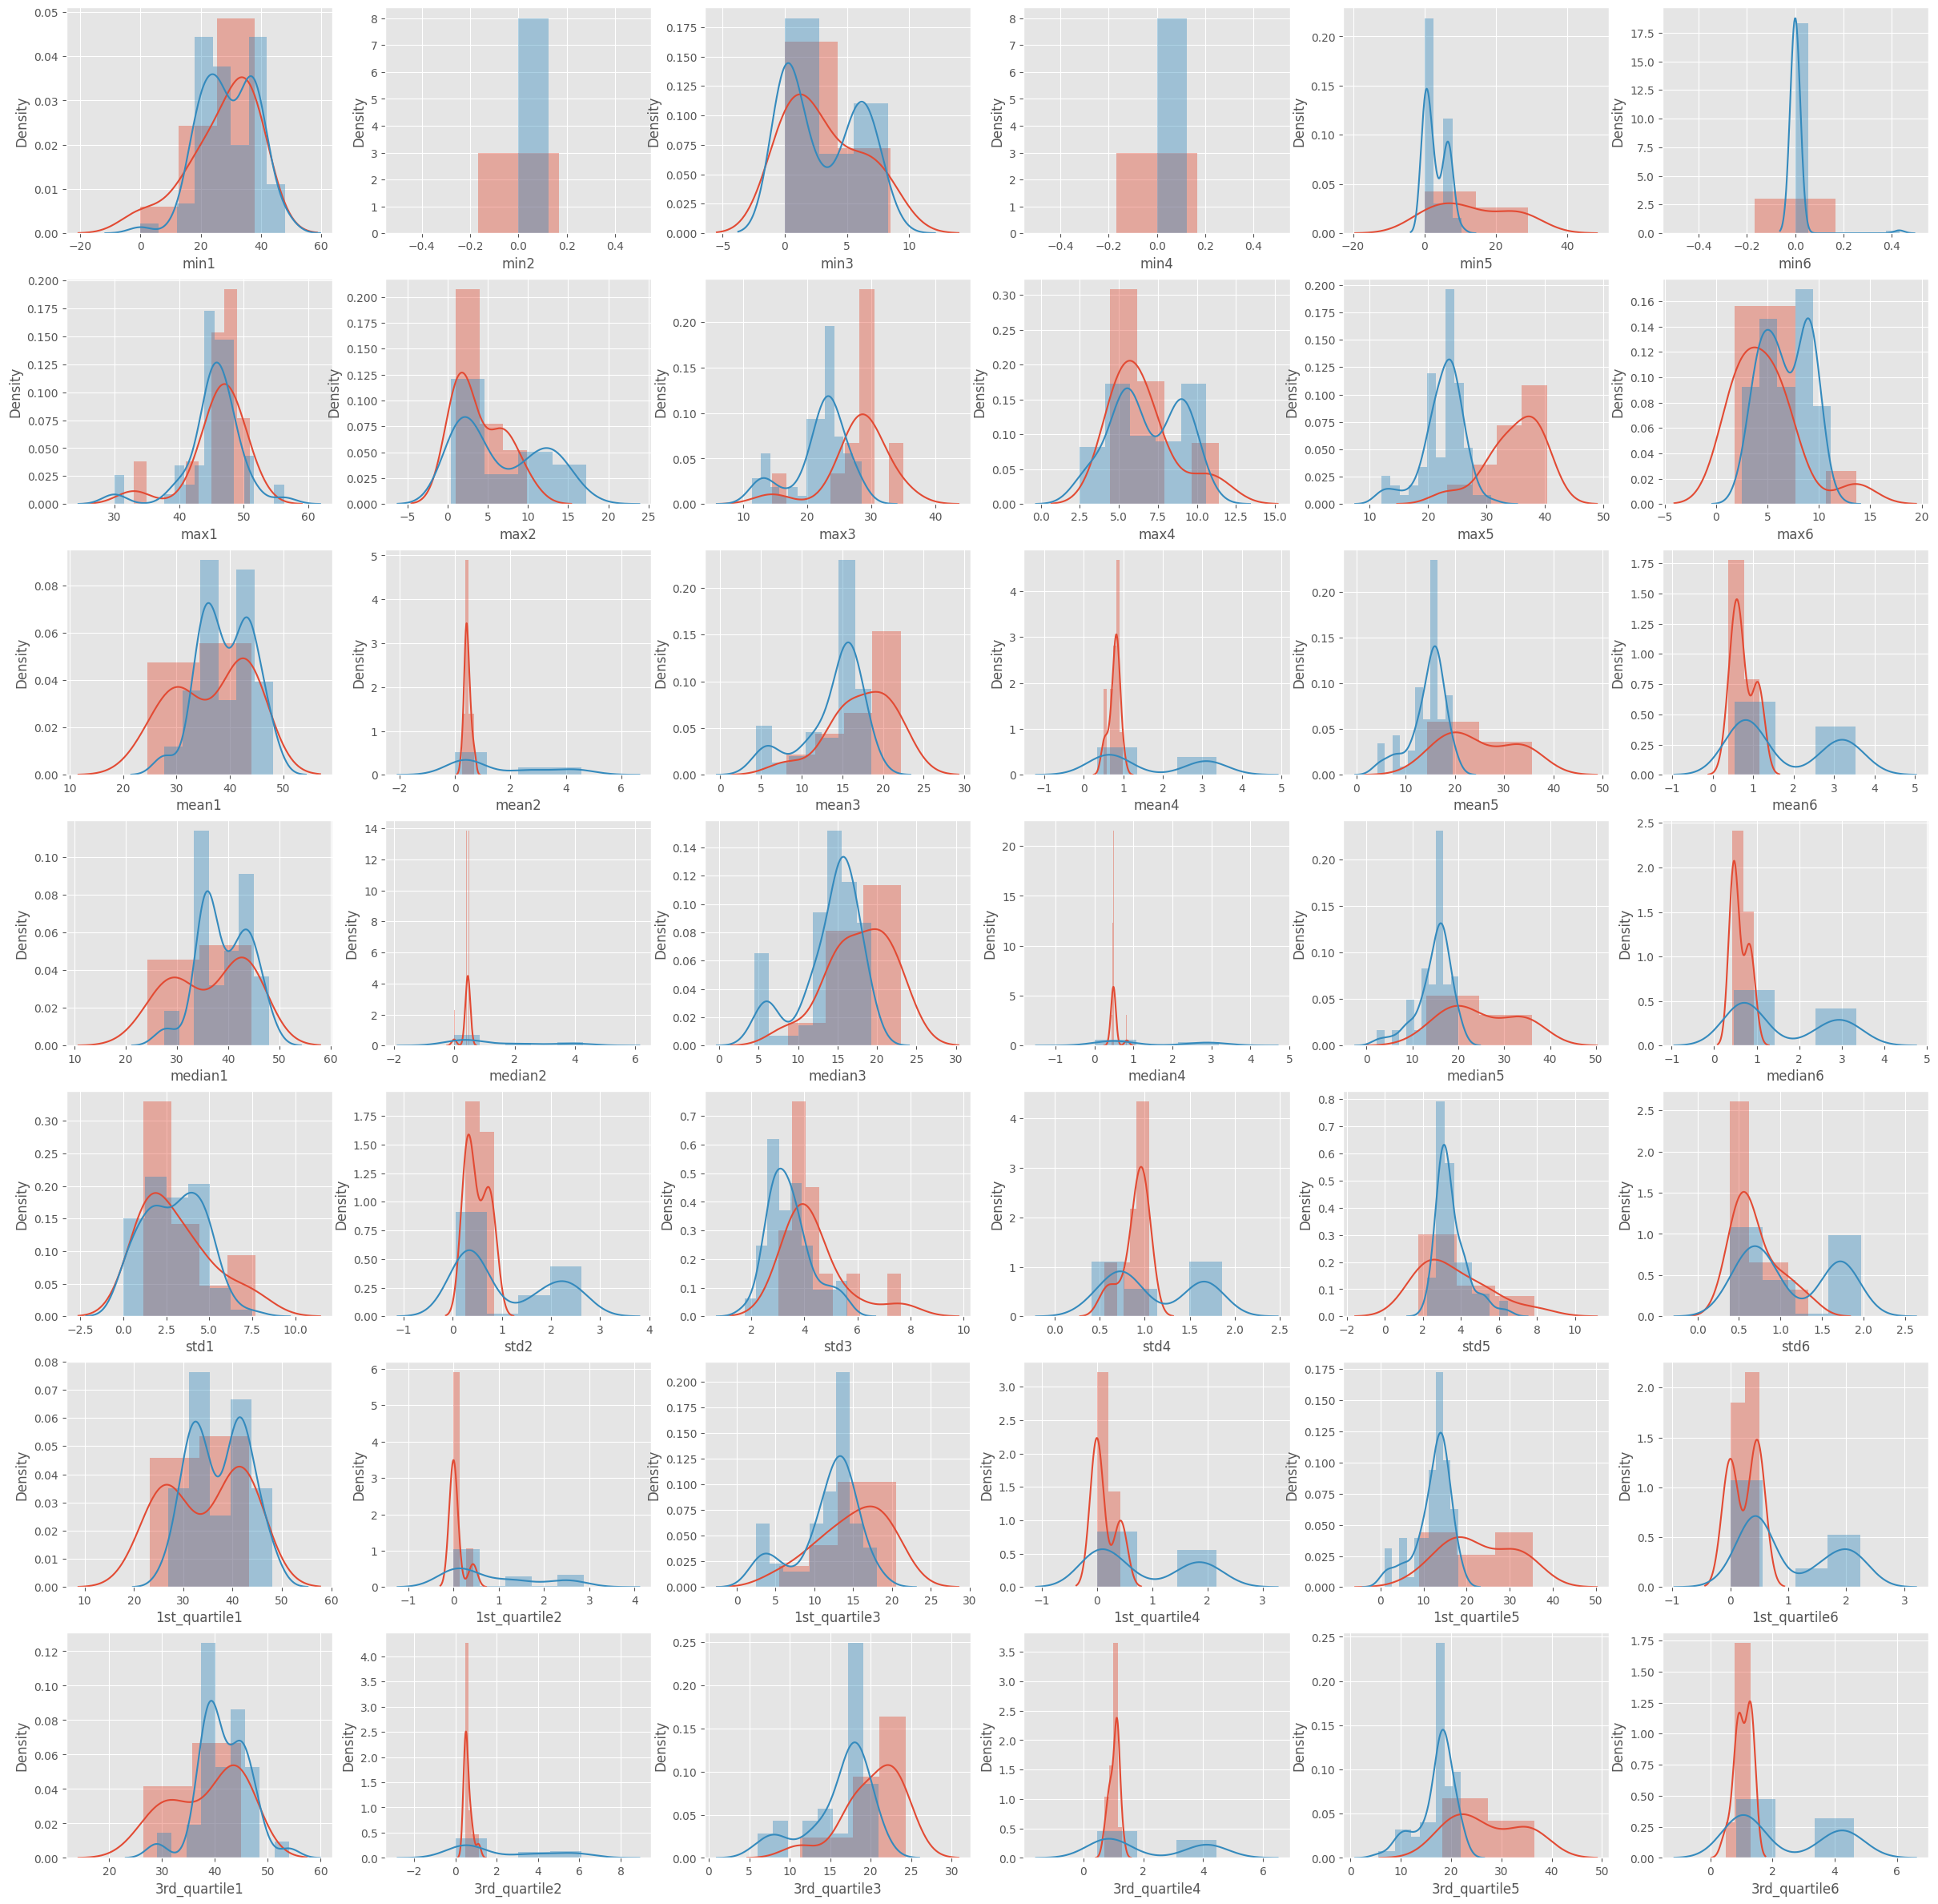

In [16]:
#convert the label from the true value to 1/0 (bending/not bending )

df = pd.DataFrame(final_data)
df.loc[df['label'].isin(['bending1', 'bending2']), 'label'] = 1
df.loc[df['label'] != 1, 'label'] = 0

name = ['min', 'max', 'mean', 'median', 'std', '1st_quartile', '3rd_quartile']
num = ['1','2','3','4','5','6']

fig, axes = plt.subplots(7, 6, figsize=(30, 30))

for i in range(0,7):
    for j in range(0,6):
        bending = df.loc[df['label'] == 1, name[i]+num[j]]
        nobending = df.loc[df['label'] == 0, name[i]+num[j]]
        sns.distplot(bending, ax = axes[i, j], label='Bending', kde='True')
        sns.distplot(nobending, ax = axes[i, j], label='Not Bending', kde='True')
    
        
plt.show()

**Ans**: According to the picture showed above, as for this regression issue, driven by the considering of clear separated distribution. Also, we should consider denser distribution which means one class has some representitive values.

So the choice would be 3rd_quartile, mean and max. 

### 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

**(a)** Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**Ans:** Since predictors are directly proportional to the fitting of the model, the RSS for linear regression would be higher as compared to the RSS for cubic regression. Because cubic regression has more parameters to fit and more flexible, which might be better fit for training dataset.



**(b)** Answer (a) using test rather than training RSS.

**Ans:** More predictors generally leads to overfitting. But we also do not have enough information about the relationship between predictor and response. If their relationship is linear, for the test case, the RSS for linear regression might be lower since it is more likely to provide relatively correct regression result.



**(c)** Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**Ans:** The fundamental principle does not change. More predictors lead to less RSS and hence, the RSS for cubic would be less. Cubic regression has more flexibility.


**(d)** Answer (c) using test rather than training RSS.

**Ans:** The information provided is insufficient as the answer will depend on the finding of which regression is the actual answer closer to.

# HW4-Time Series Classification Part 2: Binary and Multiclass Classification

## a) Binary Classification Using Logistic Regression

### i. use the training set to classify bending from other label 

Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other label. (See p. 129 of the textbook)

Note: last HW3 I choose 3rd_quartile, mean and median, but later I reviewed and change the choice to 3rd_quartile, mean and max. Because max var seems have more clear separated distribution than median.

In [11]:
def get_cols(indexes, props):
    cols = []
    for index in indexes:
        for prop in props:
            col_name = prop + str(index)
            cols.append(col_name)
    return cols

def get_labelled_cols(df, cols):
    temp = df['label']
    df.loc[temp.isin(['bending1', 'bending2']), 'label'] = 1
    df.loc[temp != 1, 'label'] = 0
    return cols + ['label']

def plot_scatter_plot(df, hue_value):
    sns.pairplot(df, hue=hue_value)
    # plt.legend(title='Bending - Non-bending Training data', loc='upper left', labels=['Non-Bending', 'Bending'])
    plt.show()

In [12]:
# use training data here, take a look
train_data

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   36.25  48.00  43.969125    44.50  1.618364         43.310          44.67   
1   37.00  48.00  43.454958    43.25  1.386098         42.500          45.00   
2   33.00  47.75  42.179812    43.50  3.670666         39.150          45.00   
3   33.00  45.75  41.678063    41.75  2.243490         41.330          42.75   
4   35.00  47.40  43.954500    44.33  1.558835         43.000          45.00   
..    ...    ...        ...      ...       ...            ...            ...   
64  18.50  44.25  35.752354    36.00  4.614802         33.000          39.33   
65  24.25  45.00  37.177042    36.25  3.581301         34.500          40.25   
66  23.33  43.50  36.248768    36.75  3.824632         33.415          39.25   
67  26.25  44.25  36.957458    36.29  3.434863         34.500          40.25   
68  27.75  44.67  37.144833    36.33  3.758904         34.000          40.50   

    min2   max2     mean2  ...  1st_quartile5  3rd_quartile5  min6   max6  \
0    0.0   1.50  0.413125  ...        20.5000        23.7500   0.0   2.96   
1    0.0   1.58  0.378083  ...        22.2500        24.0000   0.0   5.26   
2    0.0   3.00  0.696042  ...        30.4575        36.3300   0.0   2.18   
3    0.0   2.83  0.535979  ...        28.4575        31.2500   0.0   1.79   
4    0.0   1.70  0.426250  ...        35.3625        36.5000   0.0   1.79   
..   ...    ...       ...  ...            ...            ...   ...    ...   
64   0.0  12.60  3.328104  ...        14.0000        18.0625   0.0   9.39   
65   0.0   8.58  2.374208  ...        17.9500        21.7500   0.0   9.34   
66   0.0   9.71  2.737307  ...        15.7500        21.0000   0.0  11.15   
67   0.0   8.64  2.420083  ...        14.0000        18.2500   0.0   8.34   
68   0.0  10.76  2.419062  ...        15.0000        18.7500   0.0   8.75   

       mean6  median6      std6  1st_quartile6  3rd_quartile6     label  
0   0.555312    0.490  0.487826         0.0000          0.830  bending1  
1   0.679646    0.500  0.622534         0.4300          0.870  bending1  
2   0.613521    0.500  0.524317         0.0000          1.000  bending1  
3   0.383292    0.430  0.389164         0.0000          0.500  bending1  
4   0.493292    0.430  0.513506         0.0000          0.940  bending1  
..       ...      ...       ...            ...            ...       ...  
64  3.069667    2.770  1.748326         1.7975          4.060   cycling  
65  2.921729    2.500  1.852600         1.5000          3.900   cycling  
66  3.532463    3.110  1.965267         2.1700          4.625   cycling  
67  2.934625    2.525  1.631380         1.6600          4.030   cycling  
68  2.822437    2.590  1.637183         1.5800          3.740   cycling  

[69 rows x 43 columns]

In [13]:
# extract 3rd_quartile, mean and max.
selected_col = get_cols([1,2,6], ['max', 'mean', '3rd_quartile'])
selected_labelled = get_labelled_cols(train_data, selected_col)
selected_train_df = train_data[selected_labelled]
selected_train_df

max1      mean1  3rd_quartile1   max2     mean2  3rd_quartile2   max6  \
0   48.00  43.969125          44.67   1.50  0.413125         0.5000   2.96   
1   48.00  43.454958          45.00   1.58  0.378083         0.5000   5.26   
2   47.75  42.179812          45.00   3.00  0.696042         1.1200   2.18   
3   45.75  41.678063          42.75   2.83  0.535979         0.7100   1.79   
4   47.40  43.954500          45.00   1.70  0.426250         0.5000   1.79   
..    ...        ...            ...    ...       ...            ...    ...   
64  44.25  35.752354          39.33  12.60  3.328104         4.3300   9.39   
65  45.00  37.177042          40.25   8.58  2.374208         3.1300   9.34   
66  43.50  36.248768          39.25   9.71  2.737307         3.7400  11.15   
67  44.25  36.957458          40.25   8.64  2.420083         3.3500   8.34   
68  44.67  37.144833          40.50  10.76  2.419062         3.3675   8.75   

       mean6  3rd_quartile6 label  
0   0.555312          0.830     1  
1   0.679646          0.870     1  
2   0.613521          1.000     1  
3   0.383292          0.500     1  
4   0.493292          0.940     1  
..       ...            ...   ...  
64  3.069667          4.060     0  
65  2.921729          3.900     0  
66  3.532463          4.625     0  
67  2.934625          4.030     0  
68  2.822437          3.740     0  

[69 rows x 10 columns]

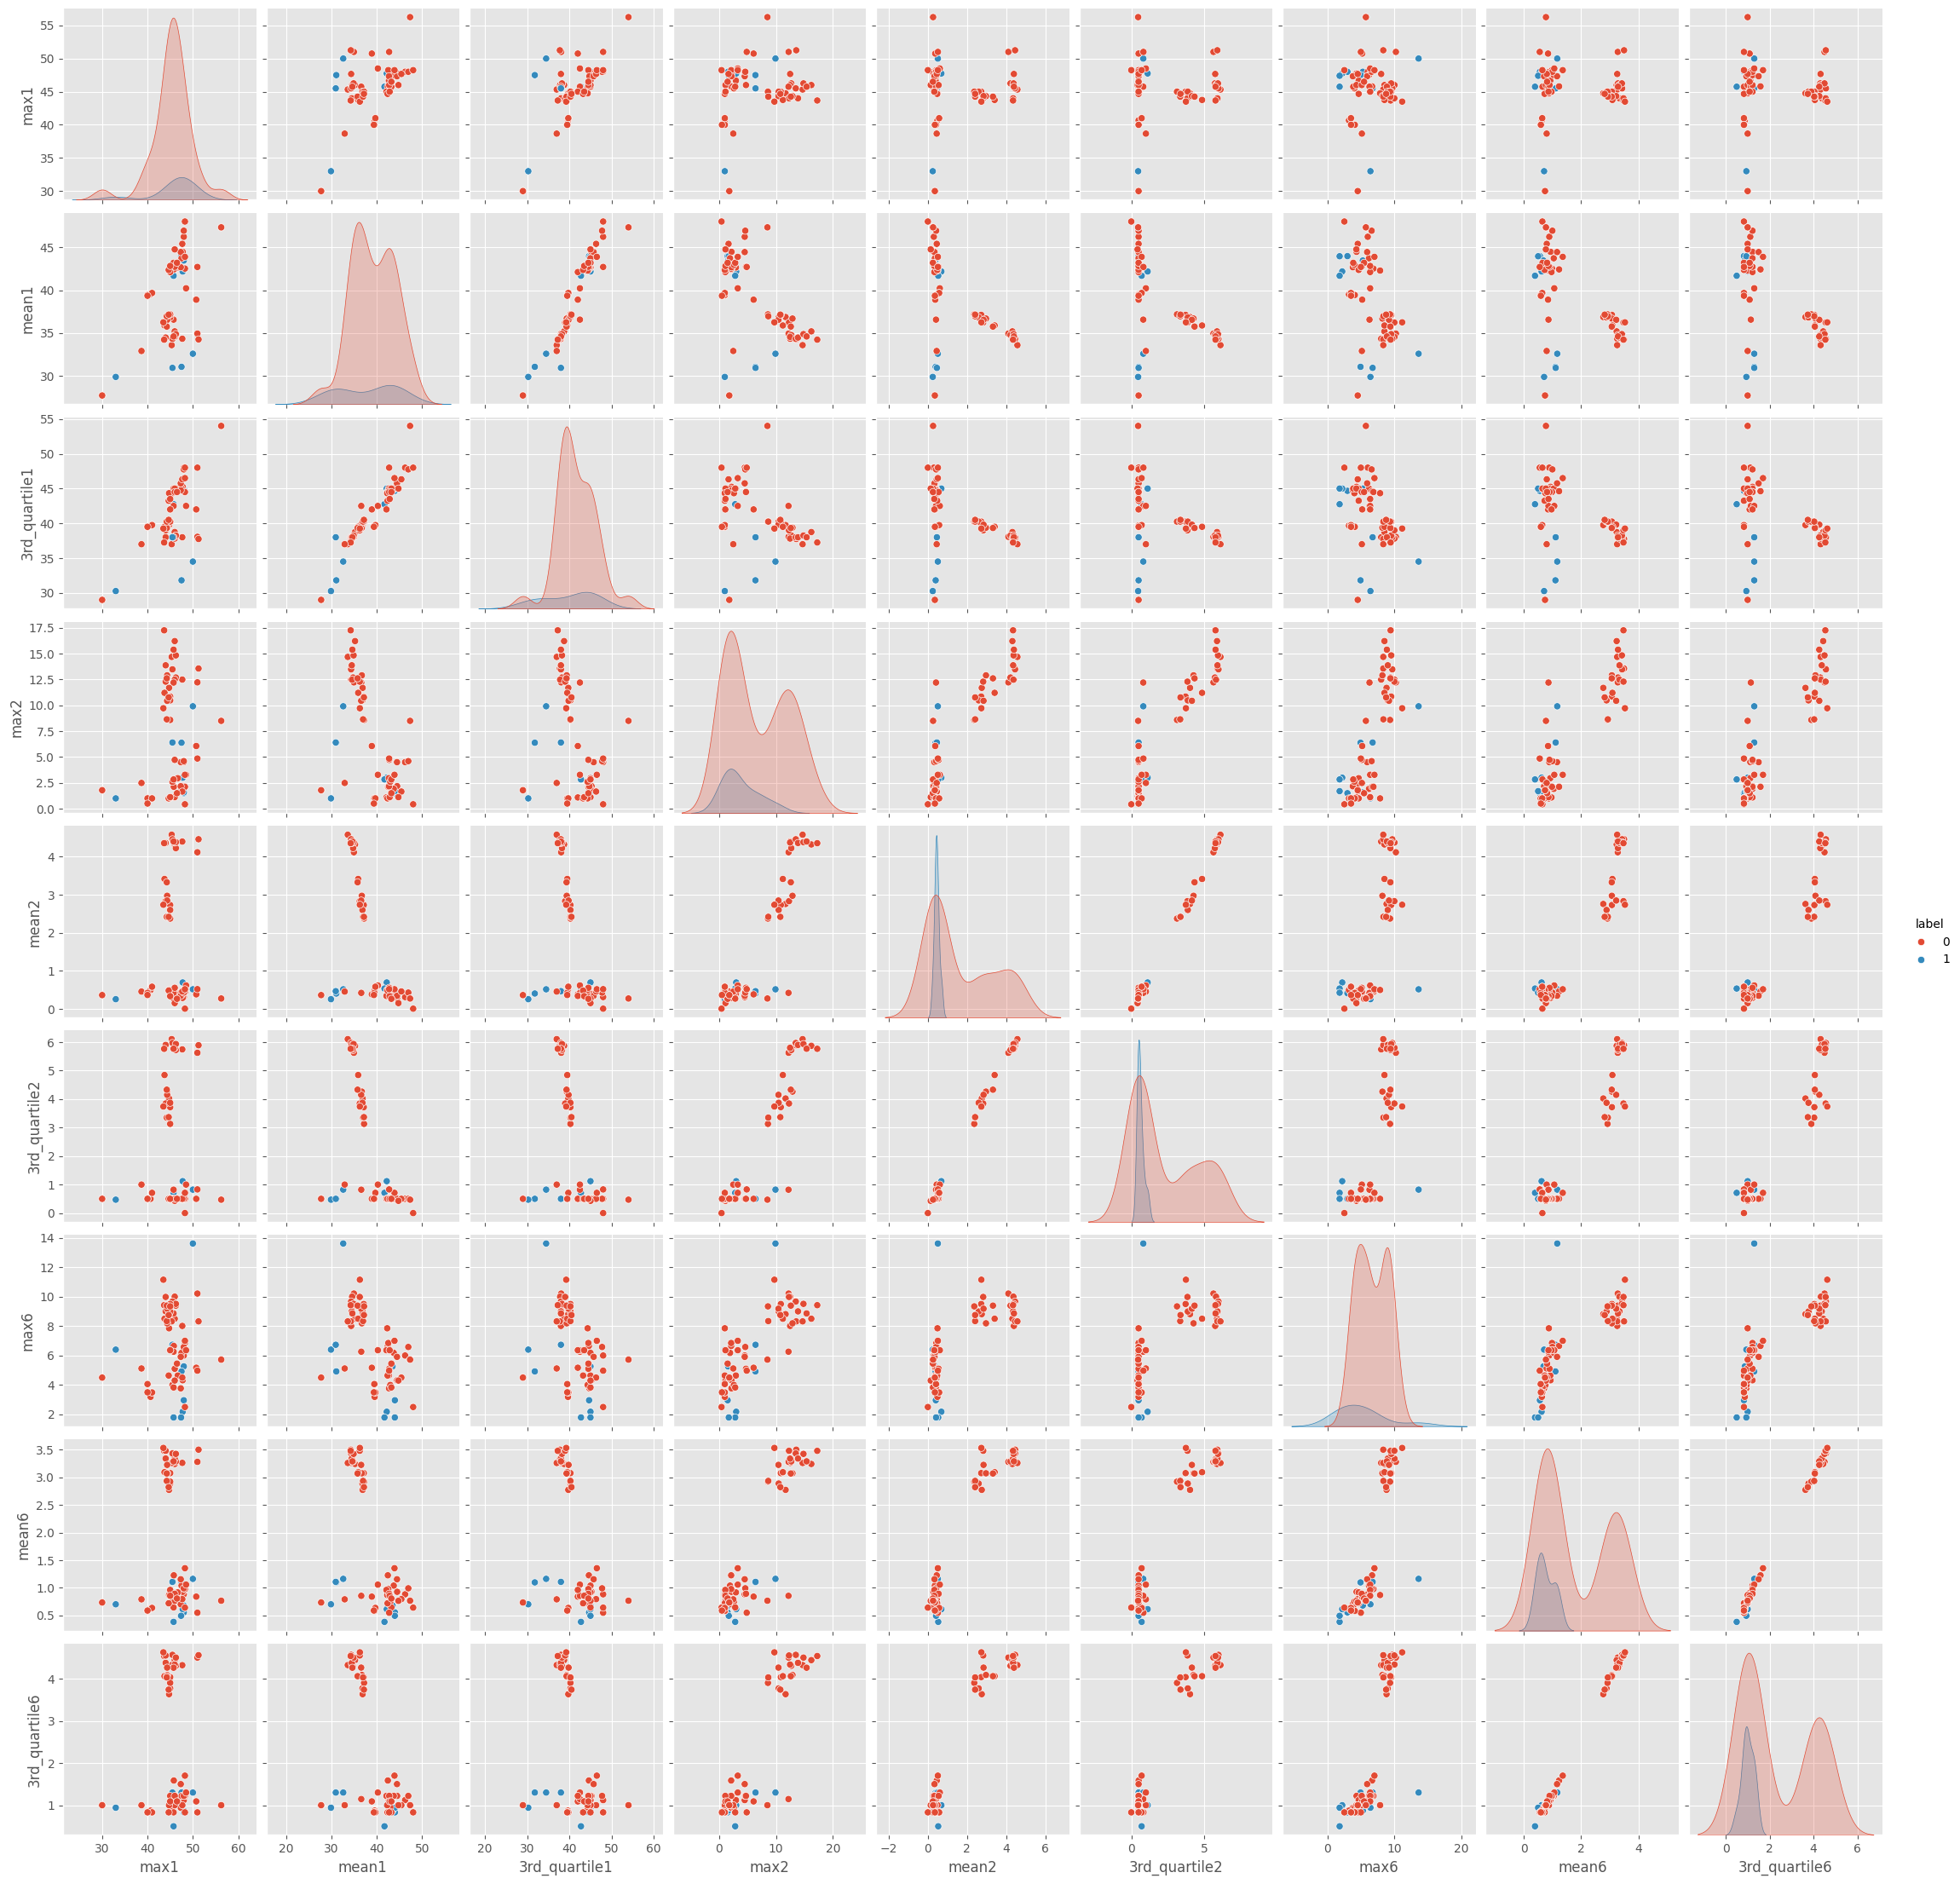

In [14]:
plot_scatter_plot(selected_train_df, 'label')

### ii. Break each time series into two (approximately) equal length time series

Then repeat the 4(a)i experiment. Do you see any considerable difference in the results with those of 4(a)i?

In [15]:
targeted_colomn2 = targeted_column(segs=2)

train_data_two = load_data(trainfiles, targeted_colomn2, segs=2)
test_data_two = load_data(testfiles, targeted_colomn2, segs=2)

In [16]:
# note that 1-6 is the previous half time series, 7-12 is the last half time series

selected_col = get_cols([1, 2, 6, 7, 8, 12], ['max', 'mean', '3rd_quartile'])
selected_labelled = get_labelled_cols(train_data_two, selected_col)
selected_train_df_2nd = train_data_two[selected_labelled]
selected_train_df_2nd

max1      mean1  3rd_quartile1   max2     mean2  3rd_quartile2  max6  \
0   45.00  43.486208          44.50   1.30  0.378667           0.50  2.28   
1   48.00  44.117042          45.00   1.30  0.250042           0.50  5.26   
2   47.75  43.278875          45.25   3.00  0.673292           1.00  1.53   
3   45.75  41.621208          44.25   2.83  0.623083           0.83  1.79   
4   46.50  44.057167          45.00   1.50  0.381042           0.50  1.79   
..    ...        ...            ...    ...       ...            ...   ...   
64  44.25  35.692167          39.25  11.39  3.324208           4.44  9.39   
65  45.00  36.954208          40.25   8.18  2.392667           3.27  9.07   
66  42.67  36.337908          39.00   9.71  2.698494           3.77  9.57   
67  43.40  36.865417          40.00   7.46  2.387250           3.35  8.26   
68  44.00  37.144583          40.33  10.76  2.385708           3.34  8.75   

       mean6  3rd_quartile6   max7      mean7  3rd_quartile7   max8     mean8  \
0   0.524875         0.8300  48.00  44.452042        44.7500   1.50  0.447583   
1   0.815417         1.1200  46.50  42.792875        43.0000   1.58  0.506125   
2   0.640958         1.2200  46.00  41.080750        44.5000   2.86  0.718792   
3   0.419083         0.7100  43.67  41.734917        42.0000   1.12  0.448875   
4   0.598250         1.0000  47.40  43.851833        45.0000   1.70  0.471458   
..       ...            ...    ...        ...            ...    ...       ...   
64  3.172417         4.3500  44.00  35.812542        39.3725  12.60  3.332000   
65  3.005375         3.9375  44.67  37.399875        40.2500   8.58  2.355750   
66  3.530962         4.6750  43.50  36.171841        39.2900   9.63  2.761715   
67  2.964792         4.0375  44.25  37.049500        40.2500   8.64  2.452917   
68  2.914708         3.9000  44.67  37.145083        40.5000   7.79  2.452417   

    3rd_quartile8  max12    mean12  3rd_quartile12 label  
0          0.5000   2.96  0.585750          0.8300     1  
1          0.5000   4.06  0.543875          0.7100     1  
2          1.2275   2.18  0.586083          0.8700     1  
3          0.5000   1.50  0.347500          0.5000     1  
4          0.5000   1.50  0.388333          0.7100     1  
..            ...    ...       ...             ...   ...  
64         4.2750   8.81  2.966917          3.7400     0  
65         3.0075   9.34  2.838083          3.8325     0  
66         3.6750  11.15  3.530669          4.5150     0  
67         3.3775   8.34  2.904458          3.7700     0  
68         3.6400   7.93  2.730167          3.7050     0  

[69 rows x 19 columns]

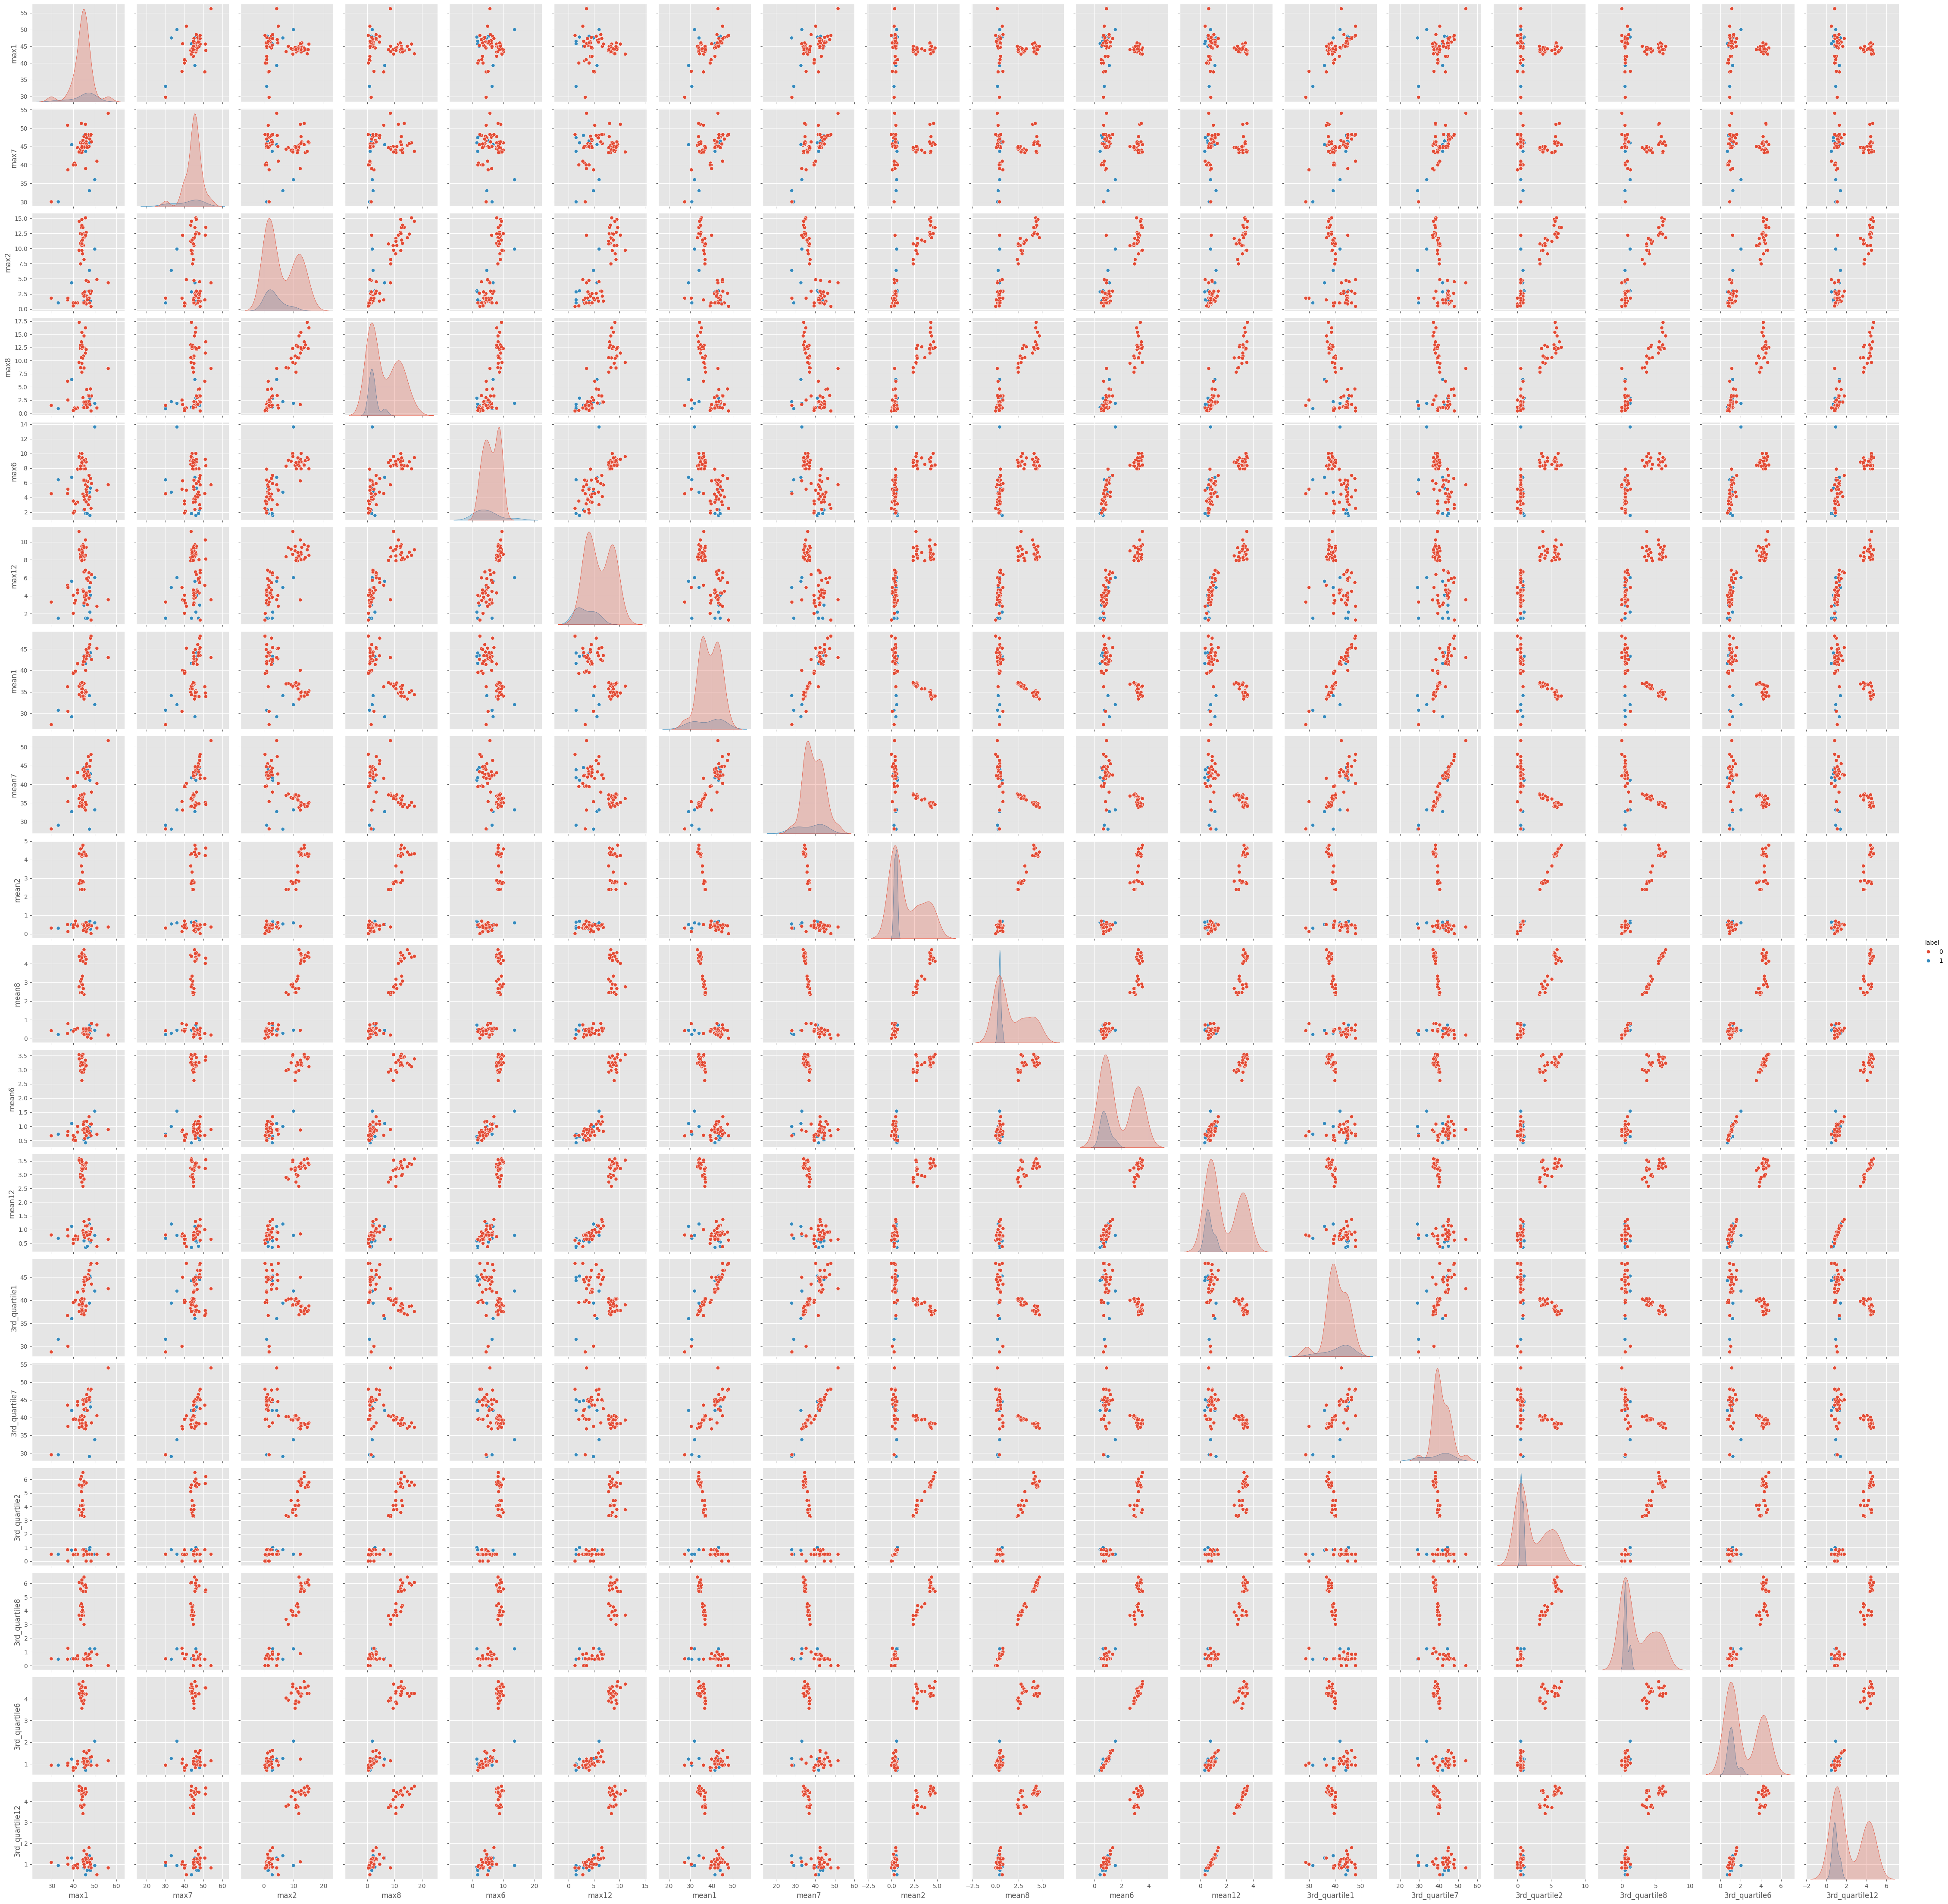

In [84]:
plot_scatter_plot(selected_train_df_2nd[['max1', 'max7','max2', 'max8','max6', 'max12',
                                         'mean1', 'mean7','mean2', 'mean8','mean6', 'mean12',
                                         '3rd_quartile1', '3rd_quartile7','3rd_quartile2', '3rd_quartile8', '3rd_quartile6', '3rd_quartile12',
                                         'label']], 'label')

**Ans** 

It seems no explicit difference after the split. 

### iii. Break each time series in your training set into l ∈ {1,2,...,20} time series
of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features

Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of l and refit a logistic regression model using your pruned set of features.6
Alternatively, you can use backward selection using sklearn.feature selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(l,p), where p is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation

In [46]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [44]:
# set an additional function for oversample, set default state as "False"
def oversample_process(data, random_state=60):
    print('Execute the oversample_process')
    # Count the instances of each class
    activity_counts = data['label'].value_counts()
    
    # Identify the minority and majority classes
    min_activity = activity_counts.idxmin()
    max_activity = activity_counts.idxmax()
    
    # Perform resampling
    min_ds = resample(data[data['label'] == min_activity],
                      replace=True,
                      n_samples=activity_counts[max_activity],
                      random_state=random_state)
    
    # Combine the resampled minority class with the majority class data
    data_balanced = pd.concat([data[data['label'] == max_activity], min_ds])
    
    return data_balanced


# split feature and labeling 
def getxy(data):
    x = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return x, y


def logistic_regression(trainfiles, l, fold_count, oversample=False, penalty=None):
    print(f"Calculate when l = {str(l)}:")
    
    new_column = targeted_column(l) # l is segs
    new_df = load_data(trainfiles, new_column, segs=l)
    
    new_df['label'] = np.where(new_df['label'].isin(['bending1', 'bending2']), "1", "0")

    if oversample:
        new_df = oversample_process(new_df)
    
    trainx, trainy = getxy(new_df)
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    # generate the subset for validation
    validator = StratifiedKFold(n_splits=fold_count, shuffle=True, random_state=69)
    
    # the regression model
    model = LogisticRegression(penalty=penalty, solver=solver, max_iter=100)
    
    # model selection, combine with cross-validation, return the selecter feature
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy')
    
    selector.fit(trainx, trainy)
    
    return model, selector


In [47]:
fold_n = 5
L = 20

# usa new dic to save cross validation result
combination = {'number of l': [],'number of feature': [], 'score': []}

# use greedy search here, did not use backward parameter
for l in range(1, L+1):
    model, selector = logistic_regression(trainfiles, l, fold_n, oversample=False)
    num_f = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    combination['number of l'].append(l)
    combination['number of feature'].append(num_f)
    combination['score'].append(round(score, 4))

df = pd.DataFrame(combination)
df

Calculate when l = 1:
Calculate when l = 2:
Calculate when l = 3:
Calculate when l = 4:
Calculate when l = 5:
Calculate when l = 6:
Calculate when l = 7:
Calculate when l = 8:
Calculate when l = 9:
Calculate when l = 10:
Calculate when l = 11:
Calculate when l = 12:
Calculate when l = 13:
Calculate when l = 14:
Calculate when l = 15:
Calculate when l = 16:
Calculate when l = 17:
Calculate when l = 18:
Calculate when l = 19:
Calculate when l = 20:


number of l  number of feature   score
0             1                  5  1.0000
1             2                  7  0.9571
2             3                  6  0.9857
3             4                 12  0.9571
4             5                 11  0.9857
5             6                 10  0.9714
6             7                 17  0.9714
7             8                 30  0.9714
8             9                 50  0.9714
9            10                 50  0.9714
10           11                 79  0.9857
11           12                  6  0.9857
12           13                  7  0.9857
13           14                 18  0.9714
14           15                 25  0.9857
15           16                 10  0.9857
16           17                 11  0.9857
17           18                  9  1.0000
18           19                  8  0.9857
19           20                 13  0.9857

In [49]:
# Since the value of l corresponding to the highest score is 1, I choose l=1 to train the model and calculate the ROC and AUC.

def selected_features(columns, selector):
    selected_features = []
    for i, feature in enumerate(columns):
        if selector.support_[i]:
            selected_features.append(feature)
    return selected_features

# use l = 1, segs = 1
model, opti_selector = logistic_regression(trainfiles, 1, 5) # 5 means cross validation
opti_features = selected_features(targeted_column(segs=1), opti_selector)

Calculate when l = 1:


In [50]:
# show the selected feature
opti_features

['3rd_quartile1', 'max2', 'min5', 'max5', '1st_quartile5']

### iv. Report the confusion matrix and show the ROC and AUC

for your classifier on train data. Report the parameters of your logistic regression betas as well as the p-values associated with them.

In [51]:
train_l1 = load_data(trainfiles, opti_features, segs=1)
train_l1['label'] = np.where(train_l1['label'].isin(['bending1', 'bending2']), "1", "0")
train_l1

3rd_quartile1   max2   min5   max5  1st_quartile5 label
0           44.67   1.50  11.33  30.75        20.5000     1
1           45.00   1.58   8.00  33.50        22.2500     1
2           45.00   3.00  20.00  38.67        30.4575     1
3           42.75   2.83  23.67  37.50        28.4575     1
4           45.00   1.70  29.00  38.50        35.3625     1
..            ...    ...    ...    ...            ...   ...
64          39.33  12.60   4.00  24.33        14.0000     0
65          40.25   8.58   7.00  25.50        17.9500     0
66          39.25   9.71   7.67  27.00        15.7500     0
67          40.25   8.64   2.00  22.25        14.0000     0
68          40.50  10.76   0.00  23.00        15.0000     0

[69 rows x 6 columns]

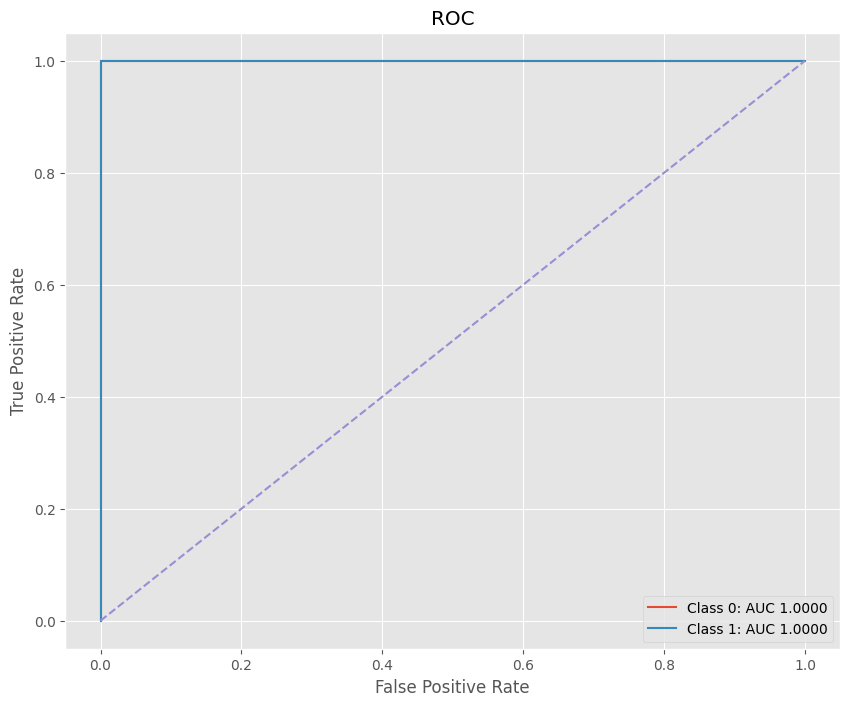

Confusion Matrix:
[[60  0]
 [ 0  9]]
accuracy score = 1.0


In [54]:
# based on the selected_value to train the model again and show the ROC picture 
trainx_l1, trainy_l1 = getxy(train_l1)

# ROC and AUC
def roc_plot(ytrue, ypred_prob, classifier):
    fig, axes = plt.subplots(figsize=(10, 8))
    axes.set_title("ROC")
    for i, j in enumerate(classifier.classes_):
        fpr, tpr, thresholds = roc_curve(ytrue, ypred_prob[:, i], pos_label=j)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class {j}: AUC {roc_auc:.4f}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

def roc_cal(x, y, features, classifier):
    classifier.fit(x[features], y.to_numpy(dtype=int))
    ypred_prob = classifier.predict_proba(x[features])
    ytrue = y.to_numpy(dtype=float)
    ypred = classifier.predict(x[features]).round().astype(int)
    roc_plot(ytrue, ypred_prob, classifier)
    
    # confusion matrix
    cm = confusion_matrix(ytrue, ypred)
    print(f"Confusion Matrix:\n{cm}")
    
    # accuracy
    print(f'accuracy score = {accuracy_score(ytrue, ypred)}')


roc_cal(trainx_l1, trainy_l1, opti_features, opti_selector)

In [55]:
df_trainx_l1 = trainx_l1.loc[:, opti_features]
id_variable = sm.add_constant(df_trainx_l1.to_numpy(dtype=float))
logiticmodel_l1 = sm.Logit(trainy_l1.to_numpy(dtype=float), id_variable)
summary = logiticmodel_l1.fit(method='bfgs').summary()

print(summary)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        21:26:32   Log-Likelihood:            -1.5602e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.738e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0993   2.87e+08  -3.8

### v. Test the classifier on the test set. 

Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

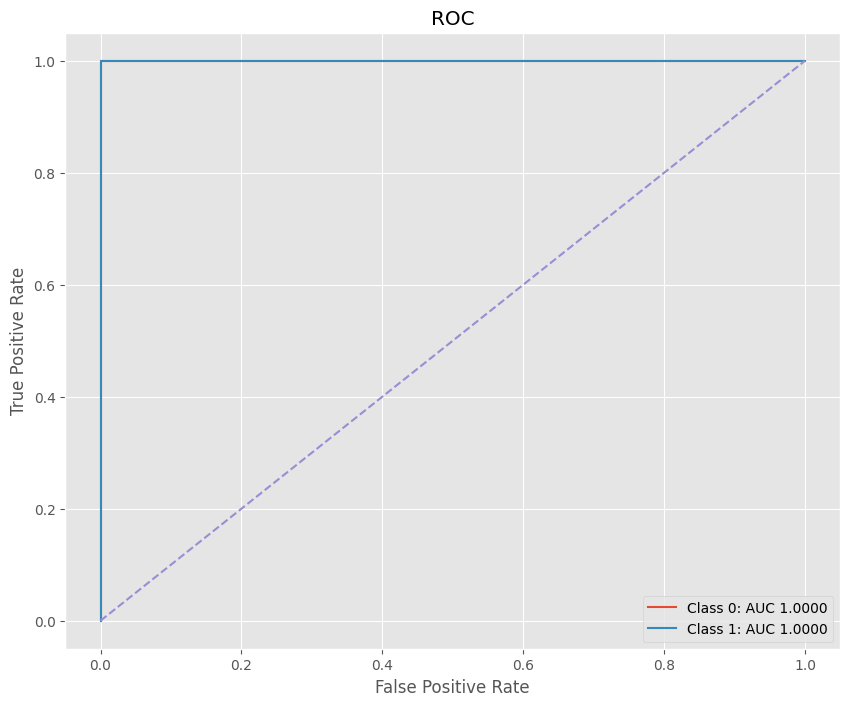

Confusion Matrix:
[[15  0]
 [ 0  4]]
accuracy score = 1.0


In [59]:
test_l1 = load_data(testfiles, opti_features, segs=1)
test_l1['label'] = np.where(test_l1['label'].isin(['bending1', 'bending2']), "1", "0")
testx_l1, testy_l1 = getxy(test_l1)

roc_cal(testx_l1, testy_l1, opti_features, opti_selector)

**Ans**

the accuracy in both test and cross-valication are almost identical

### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

**Ans:** 
- Yes. All the p-value in each predictors are unsignificant, suggesting that there is **Complete Separation**. In this case the Maximum Likelihood Estimator does not exist and the parameters are not identified.


- Due to this finding, it is possible that the well-separation of the classes is cauisng the instability in calculation o fthe regression parameters.

### vii) From the confusion matrices you obtained, do you see imbalanced classes? 

If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

**Ans:**

- Yes. 0 = non-bending classes and 1 = bending classes. The confusion matrices shows that there are 69 instances of non-bending classes and 9 instances for bending classes, which means the classes are definitely imbalanced.

- The following step I'll build model based on case-control and adjust parameters

**vii) case control sampling logistic regression**

In [60]:
# Logistic Regression with oversampling
fold_n = 5
L = 20
combination = {'pair(l, p)': [],'score': []}

for l in range(1, L + 1):
    model, selector = logistic_regression(trainfiles, l, fold_n, oversample=True) # change the oversample setting to True
    num_f = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    combination['pair(l, p)'].append((l, num_f))
    combination['score'].append(round(score, 4))

df = pd.DataFrame(combination)
df

Calculate when l = 1:
Execute the oversample_process
Calculate when l = 2:
Execute the oversample_process
Calculate when l = 3:
Execute the oversample_process
Calculate when l = 4:
Execute the oversample_process
Calculate when l = 5:
Execute the oversample_process
Calculate when l = 6:
Execute the oversample_process
Calculate when l = 7:
Execute the oversample_process
Calculate when l = 8:
Execute the oversample_process
Calculate when l = 9:
Execute the oversample_process
Calculate when l = 10:
Execute the oversample_process
Calculate when l = 11:
Execute the oversample_process
Calculate when l = 12:
Execute the oversample_process
Calculate when l = 13:
Execute the oversample_process
Calculate when l = 14:
Execute the oversample_process
Calculate when l = 15:
Execute the oversample_process
Calculate when l = 16:
Execute the oversample_process
Calculate when l = 17:
Execute the oversample_process
Calculate when l = 18:
Execute the oversample_process
Calculate when l = 19:
Execute the ov

pair(l, p)   score
0      (1, 3)  1.0000
1      (2, 5)  0.9833
2      (3, 6)  1.0000
3      (4, 2)  0.9917
4      (5, 6)  1.0000
5      (6, 2)  0.9917
6      (7, 3)  0.9917
7      (8, 3)  0.9917
8      (9, 3)  0.9917
9     (10, 6)  1.0000
10    (11, 2)  0.9917
11    (12, 4)  0.9917
12    (13, 5)  1.0000
13   (14, 16)  1.0000
14    (15, 5)  1.0000
15    (16, 8)  1.0000
16    (17, 6)  1.0000
17    (18, 5)  1.0000
18    (19, 3)  1.0000
19    (20, 7)  1.0000

In [61]:
# use l = 1
feature = targeted_column(segs=1)
classifier, selector = logistic_regression(trainfiles, 1, 5, oversample=True)  
opti_features = selected_features(feature, selector)
opti_features

Calculate when l = 1:
Execute the oversample_process


['3rd_quartile1', 'max5', '1st_quartile5']

Execute the oversample_process


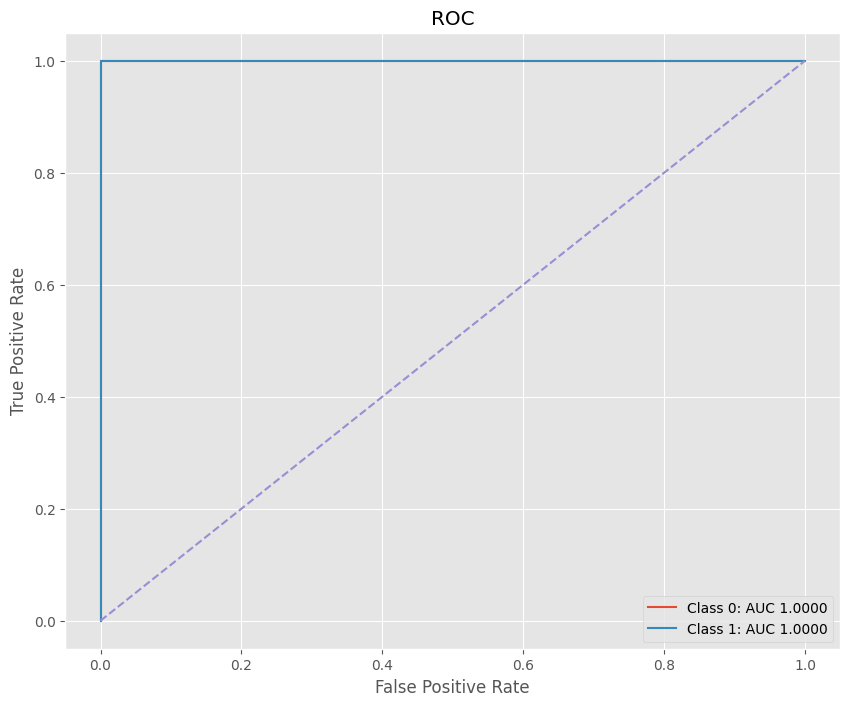

Confusion Matrix:
[[60  0]
 [ 0 60]]
accuracy score = 1.0


In [39]:
training_l1 = load_data(trainfiles, opti_features, segs=1)
training_l1['label'] = np.where(training_l1['label'].isin(['bending1', 'bending2']), "1", "0")

train_set = oversample_process(training_l1)
trainX, trainY = getxy(train_set)

roc_cal(trainX, trainY, opti_features, classifier)

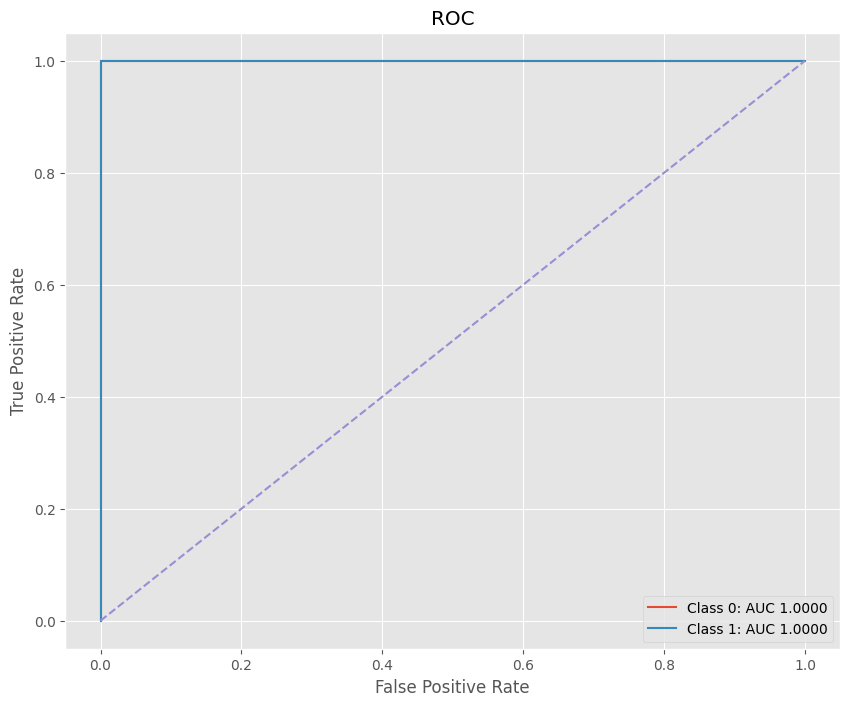

Confusion Matrix:
[[15  0]
 [ 0  4]]
accuracy score = 1.0


In [40]:
testing_l1 = load_data(testfiles, opti_features, segs=1)
testing_l1['label'] = np.where(testing_l1['label'].isin(['bending1', 'bending2']), "1", "0")

# ATT: here, for test dataset, should not execute oversample process

trainX, trainY = getxy(testing_l1)

roc_cal(trainX, trainY, opti_features, classifier)

## (b) Binary Classification Using L1-penalized logistic regression

### i. Repeat 2(a)iii using L1-penalized logistic regression

i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9

In [42]:
def classifyirr(classifier_obj, kwargs, binary_classes):
    for l in range(1, 20 + 1):
        
        print("When l = " + str(l))
        new_column = targeted_column(l)
        
        new_traindata = load_data(trainfiles, new_column, segs=l)
        new_traindata = pd.DataFrame(new_traindata)
        
        new_testdata = load_data(testfiles, new_column, segs=l)
        new_testdata = pd.DataFrame(new_testdata)
        
        if binary_classes:
            new_traindata['label'] = np.where(new_traindata['label'].isin(['bending1', 'bending2']), "1", "0")
            new_testdata['label'] = np.where(new_testdata['label'].isin(['bending1', 'bending2']), "1", "0")
        
        new_trainx, new_trainy = getxy(new_traindata)
        new_testx, new_testy = getxy(new_testdata)
        
        # build classifier to fit
        classifier = classifier_obj(**kwargs)
        classifier.fit(new_trainx, new_trainy)
        
        # calculate the scores
        train_score = classifier.score(new_trainx, new_trainy)
        test_score = classifier.score(new_testx, new_testy)
        print("Results when l = {} : train scores {}, test score {}".format(l, 
                                                     round(train_score, 4), 
                                                     round(test_score, 4)))
 

# parameter settings to create model
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100,
    'scoring' : 'accuracy',
    'cv' : 5,
    'random_state' : 69,
    'solver' : 'liblinear'
}

classifyirr(LogisticRegressionCV, kwargs, binary_classes=True)

When l = 1
Results when l = 1 : train scores 1.0, test score 1.0
When l = 2
Results when l = 2 : train scores 1.0, test score 1.0
When l = 3
Results when l = 3 : train scores 1.0, test score 1.0
When l = 4
Results when l = 4 : train scores 1.0, test score 0.9474
When l = 5
Results when l = 5 : train scores 1.0, test score 0.9474
When l = 6
Results when l = 6 : train scores 1.0, test score 0.9474
When l = 7
Results when l = 7 : train scores 1.0, test score 1.0
When l = 8
Results when l = 8 : train scores 1.0, test score 0.9474
When l = 9
Results when l = 9 : train scores 1.0, test score 0.9474
When l = 10
Results when l = 10 : train scores 1.0, test score 0.9474
When l = 11
Results when l = 11 : train scores 1.0, test score 0.9474
When l = 12
Results when l = 12 : train scores 1.0, test score 1.0
When l = 13
Results when l = 13 : train scores 1.0, test score 1.0
When l = 14
Results when l = 14 : train scores 1.0, test score 0.9474
When l = 15
Results when l = 15 : train scores 1.0, test

trainset ROC Plot


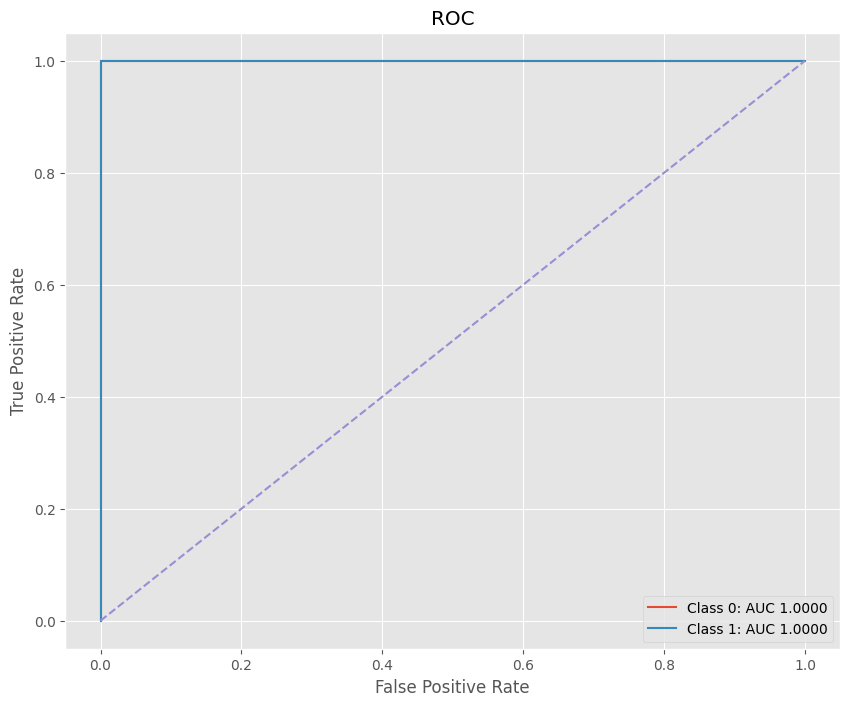

testset ROC Plot


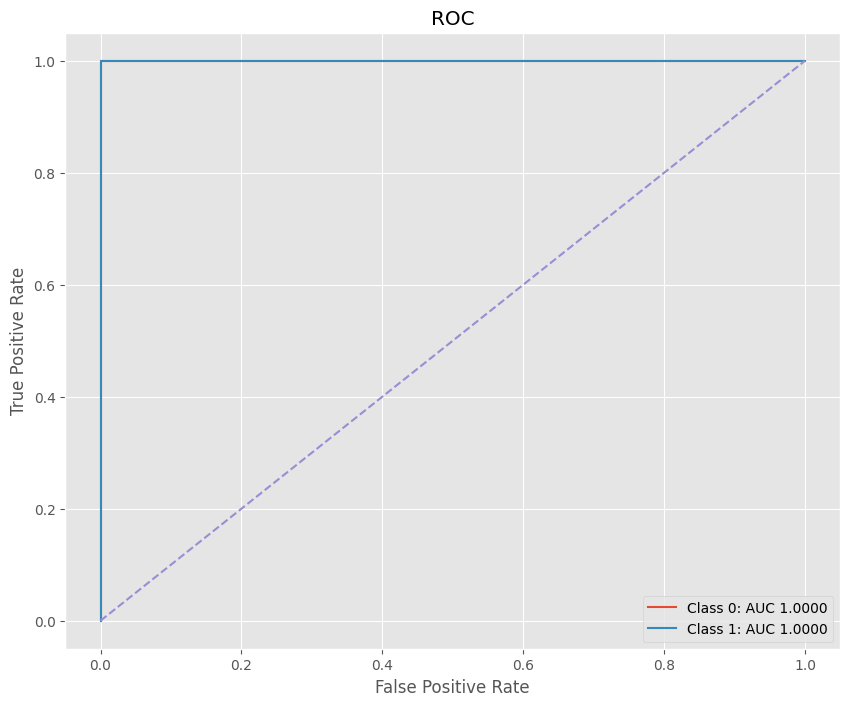

Confusion matrix on test set:
[[15  0]
 [ 0  4]]


In [31]:
def roc_plot(ytrue, ypred_prob, classifier):
    fig, axes = plt.subplots(figsize=(10, 8))
    axes.set_title("ROC")
    for i, j in enumerate(classifier.classes_):
        fpr, tpr, thresholds = roc_curve(ytrue, ypred_prob[:, i], pos_label=j)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class {j}: AUC {roc_auc:.4f}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

def usebestopt(l, classifier_obj, kwargs, binary_classes):

    new_column = targeted_column(l)
    new_traindata = load_data(trainfiles, new_column, segs=l) 
    new_testdata = load_data(testfiles, new_column, segs=l)
    
    if binary_classes:
        new_traindata['label'] = np.where(new_traindata['label'].isin(['bending1', 'bending2']), "1", "0")
        new_testdata['label'] = np.where(new_testdata['label'].isin(['bending1', 'bending2']), "1", "0")
        
    new_trainx, new_trainy = getxy(new_traindata)
    new_testx, new_testy = getxy(new_testdata)
        
    # build classifier to fit
    classifier = classifier_obj(**kwargs)
    classifier.fit(new_trainx, new_trainy)
        
    # get prediction probability for both train and test, this is used to get ROC curve
    train_predictY_prob = classifier.predict_proba(new_trainx)
    predictY_prob = classifier.predict_proba(new_testx)
    
    # get prediction of test set and its confusion matrix
    predictY = classifier.predict(new_testx)
    conf_mat = confusion_matrix(new_testy, predictY)
   
    
    print("trainset ROC Plot")
    roc_plot(new_trainy, train_predictY_prob, classifier)
    
    print("testset ROC Plot")
    roc_plot(new_testy, predictY_prob, classifier)
    
    print("Confusion matrix on test set:\n{}".format(conf_mat))
    
    
    
# based on the maximum accuracy with 100%, choose l=1
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100, 
    'solver' : 'liblinear'
}

usebestopt(1, LogisticRegression, kwargs, binary_classes=True)

### ii. Compare the L1-penalized with variable selection using p-values. 

Which one performs better? Which one is easier to implement?

**Ans**

The L1-penalized logistic regression has better performance in terms of accuracy on the test data (approximately ~ 1.0). So the L1-penalized performs better. The L1-regularization is easier to implement as feature selection does not need to be manual.

## (c) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set cross-validation for λ automatically.

In [43]:
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100,
    'multi_class' : 'multinomial',
    'cv' : 5,
    'random_state' : 69,
    'solver' : 'saga'
}

classifyirr(LogisticRegressionCV, kwargs, binary_classes=False)

When l = 1
Results when l = 1 : train scores 1.0, test score 0.8947
When l = 2
Results when l = 2 : train scores 1.0, test score 0.9474
When l = 3
Results when l = 3 : train scores 1.0, test score 0.8421
When l = 4
Results when l = 4 : train scores 1.0, test score 0.8947
When l = 5
Results when l = 5 : train scores 1.0, test score 0.8421
When l = 6
Results when l = 6 : train scores 1.0, test score 0.7895
When l = 7
Results when l = 7 : train scores 1.0, test score 0.7368
When l = 8
Results when l = 8 : train scores 1.0, test score 0.7895
When l = 9
Results when l = 9 : train scores 0.9855, test score 0.7895
When l = 10
Results when l = 10 : train scores 1.0, test score 0.8421
When l = 11
Results when l = 11 : train scores 1.0, test score 0.7895
When l = 12
Results when l = 12 : train scores 1.0, test score 0.7895
When l = 13
Results when l = 13 : train scores 0.9855, test score 0.7895
When l = 14
Results when l = 14 : train scores 1.0, test score 0.8421
When l = 15
Results when l = 15 

Result shows that **the best l is 2**, as it has highest test score = 0.9474

In [44]:
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100, 
    'multi_class' : 'multinomial', 
    'solver' : 'saga'
}

trainset ROC Plot


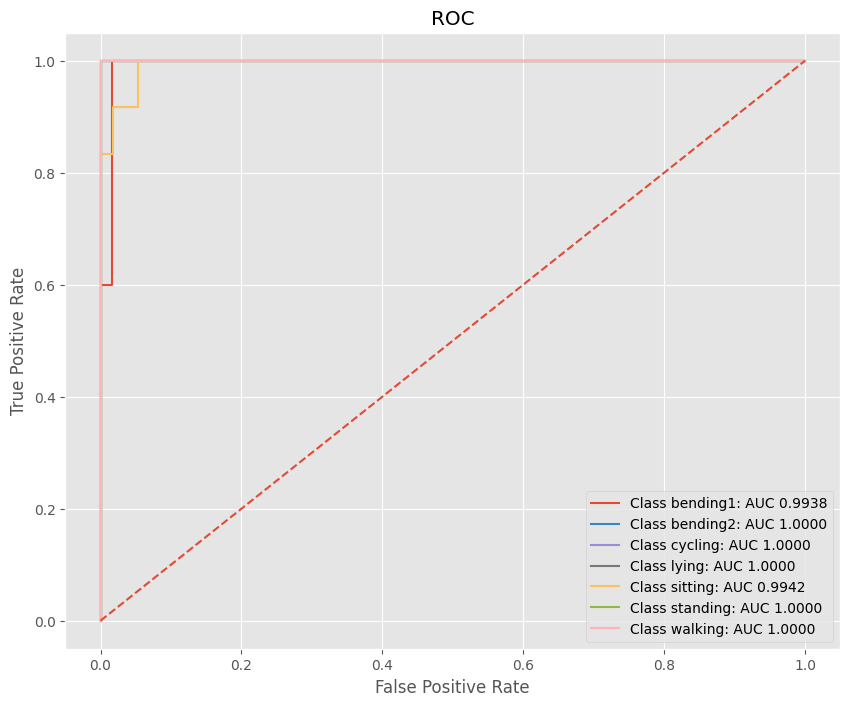

testset ROC Plot


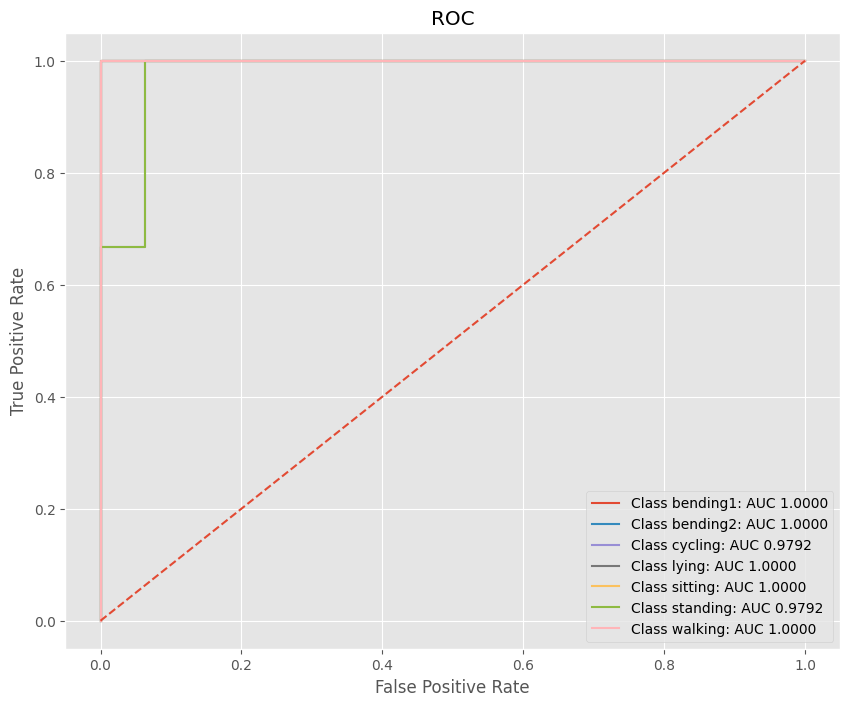

Confusion matrix on test set:
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


In [45]:
usebestopt(2, LogisticRegression, kwargs, binary_classes=False)

ii) Repeat 2(c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [46]:
classifyirr(GaussianNB, {}, binary_classes=False)

When l = 1
Results when l = 1 : train scores 1.0, test score 0.8947
When l = 2
Results when l = 2 : train scores 1.0, test score 0.6316
When l = 3
Results when l = 3 : train scores 0.9855, test score 0.7368
When l = 4
Results when l = 4 : train scores 1.0, test score 0.7895
When l = 5
Results when l = 5 : train scores 0.9855, test score 0.7895
When l = 6
Results when l = 6 : train scores 0.971, test score 0.6316
When l = 7
Results when l = 7 : train scores 1.0, test score 0.7368
When l = 8
Results when l = 8 : train scores 0.9855, test score 0.7368
When l = 9
Results when l = 9 : train scores 1.0, test score 0.6842
When l = 10
Results when l = 10 : train scores 1.0, test score 0.7895
When l = 11
Results when l = 11 : train scores 0.9855, test score 0.6842
When l = 12
Results when l = 12 : train scores 1.0, test score 0.6316
When l = 13
Results when l = 13 : train scores 1.0, test score 0.7368
When l = 14
Results when l = 14 : train scores 1.0, test score 0.5789
When l = 15
Results when

For Gaussian Prior, the results shows **l=1** is the optimal choice

trainset ROC Plot


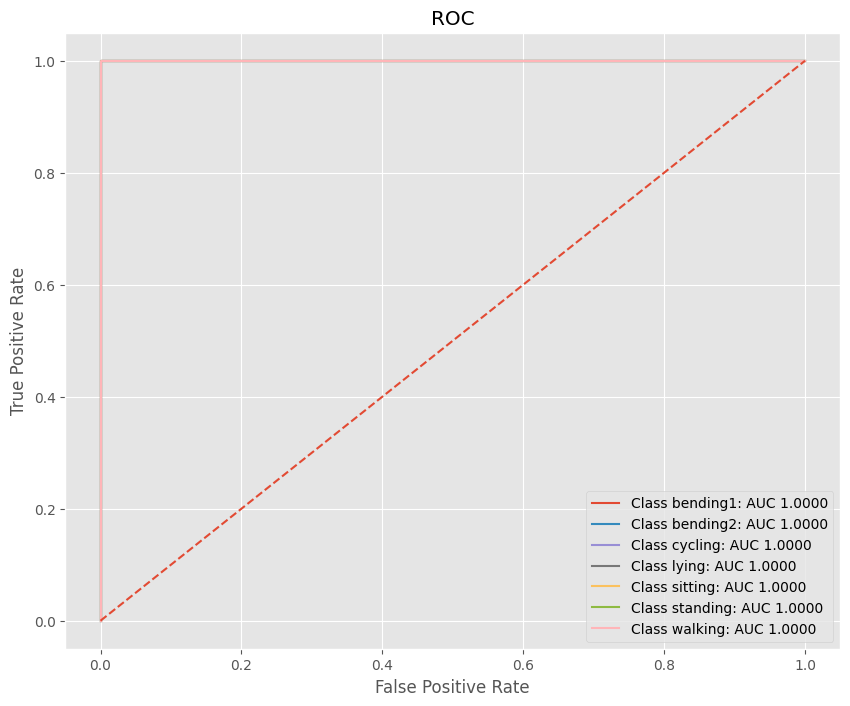

testset ROC Plot


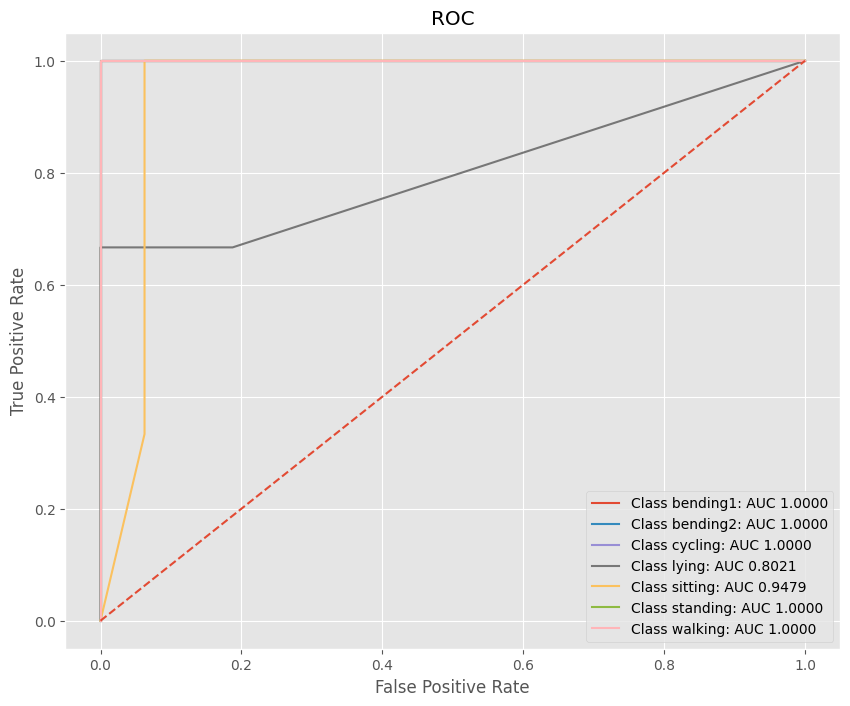

Confusion matrix on test set:
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


In [47]:
usebestopt(1, GaussianNB, {}, binary_classes=False)

In [48]:
# for MultinomiaNB
classifyirr(MultinomialNB, {}, binary_classes=False)

When l = 1
Results when l = 1 : train scores 0.9275, test score 0.8947
When l = 2
Results when l = 2 : train scores 0.8841, test score 0.7368
When l = 3
Results when l = 3 : train scores 0.8986, test score 0.7895
When l = 4
Results when l = 4 : train scores 0.913, test score 0.7895
When l = 5
Results when l = 5 : train scores 0.9275, test score 0.7368
When l = 6
Results when l = 6 : train scores 0.9565, test score 0.7368
When l = 7
Results when l = 7 : train scores 0.942, test score 0.7368
When l = 8
Results when l = 8 : train scores 0.942, test score 0.7368
When l = 9
Results when l = 9 : train scores 0.942, test score 0.7368
When l = 10
Results when l = 10 : train scores 0.942, test score 0.7368
When l = 11
Results when l = 11 : train scores 0.942, test score 0.7368
When l = 12
Results when l = 12 : train scores 0.942, test score 0.7368
When l = 13
Results when l = 13 : train scores 0.942, test score 0.7895
When l = 14
Results when l = 14 : train scores 0.942, test score 0.7895
When 

For MultinomiaNB Prior, the results shows **l=1** is the optimal choice

trainset ROC Plot


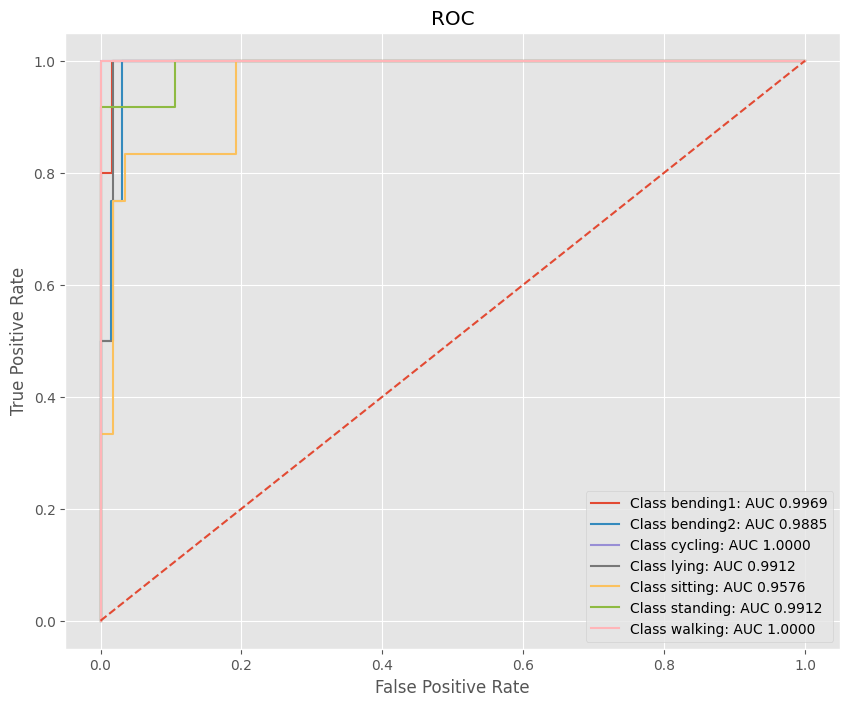

testset ROC Plot


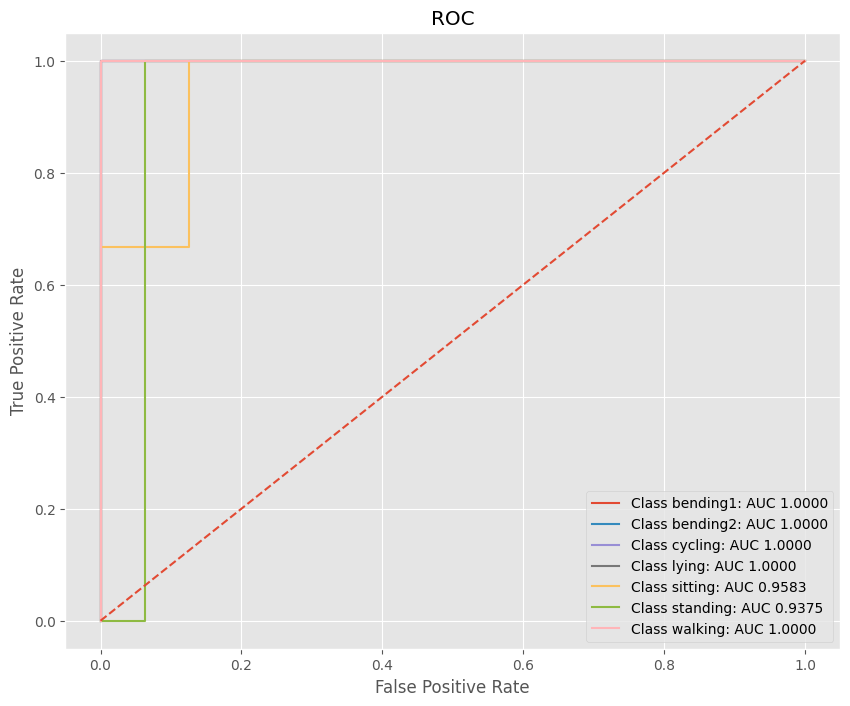

Confusion matrix on test set:
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


In [49]:
usebestopt(1, MultinomialNB, {}, binary_classes=False)

iii. Which method is better for multiclass classification in this problem?

**Ans**

The three models have the same error rate on test set. Nevertheless, the logistic regression displays superior ROC curves, with higher AUC values across all categories.

# 3) ISLR 4.8.3

![image.png](Q4-8-3.jpg)

# 3) ISLR 4.8.7

![image.png](Q4-8-7.jpg)